# **Wombus World**

### Background: <a class="anchor" id="background"></a>

A popular exercise in Artificial Intelligence is the Wumpus World, inspired by the video game, Hunt the Wumpus,
by Gregory Yob in 1973. Wumpus World serves as an introduction to knowledge-based agents and knowledge representation.
In the scenario, the agent is trying to navigate a series of rooms to reach its target, gold, while not falling into any pits or being eaten by Wombi (what we assume is the plural version of Wumpus).

After millions of years of evolution, the Wumpus have evolved into the far superior Wombus. These Wombi are extremely data-oriented creatures and keep track of their skills and preferences in a way that far exceeds the accuracy of traditional resumes. By becoming knowledge-based agents themselves, they have sensed a great opportunity at Nelnet. After flocking to our [careers website](https://nelnetinc.com/careers/), the Wombi have used their actuators to apply for jobs across all the numerous industries Nelnet currently operates in. 

### Problem Statement:

Recruiters is overwelmed by the amount of requests from job applicants and <u>need help screening candidates</u> to ease the burden of manual recruitments. They sent over the 2 spreadsheets that Mr. Intern prepared for us: 
* wombi_candidates.csv - List of candidates that recruiting needs help prioritizing
* wombi_employees.csv - List of current or former employees with their most recent performance scores appended

These files were currupted due to some internal problems, where some of the datas are lost. Luckily for us, these files are accurate and noise-free in the aftermath. 

### Objective: 
* Use EDA and report any interesting finding
* Create a regression model that uses 'score' as predictor variable, and predict which Wombi to move forward in the interview process
    * Assume recruiters has only enough resources to interview 100 candidates
* Include data visualization using the dataset to communicate insights

----
-----
### Data Dictionary:
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Attribute Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>wombus_id</td>
      <td>ID number assigned to the Wombus.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>birth_continent</td>
      <td>Continent Wombus was born on.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>gender</td>
      <td>Male/Female designation for Wombus</td>
    </tr>
    <tr>
      <th>3</th>
      <td>age</td>
      <td>Age of Wombus(in years).</td>
    </tr>
    <tr>
      <th>4</th>
      <td>college_degree</td>
      <td>Whether or not the Wombus holds a college degree</td>
    </tr>
    <tr>
      <th>5</th>
      <td>problem_solving_skill</td>
      <td>Measurement of a Wombus's ability to problem solve on a scale of 30 (worst to 1 (best)</td>
    </tr>
    <tr>
      <th>6</th>
      <td>technology_skill</td>
      <td>Measurement of a Wombus's technological ability on a scale of 40 (worst) to 1 (best)</td>
    </tr>
    <tr>
      <th>7</th>
      <td>english_skill</td>
      <td>Measurement of a Wombus's English ability on a scale of 0 (worst) to 10(best).</td>
    </tr>
    <tr>
      <th>8</th>
      <td>most_recent_income</td>
      <td>Amount of money in WombiCoin (a Wombus cryptocurrency) paid annually at last job</td>
    </tr>
    <tr>
      <th>9</th>
      <td>total_jobs</td>
      <td>Total number of jobs the Wombus has had</td>
    </tr>
    <tr>
      <th>10</th>
      <td>shirt_color_preference</td>
      <td>Which color of Nelnet t-shirt the Wombus requested in their application (company swag is important)</td>
    </tr>
    <tr>
      <th>11</th>
      <td>customer_exp_preference</td>
      <td>Strongly Agree to Strongly Disagree response for providing superior customer experience</td>
    </tr>
    <tr>
      <th>12</th>
      <td>work_env_preference</td>
      <td>Strongly Agree to Strongly Disagree response for creating an awesome work environment</td>
    </tr>
    <tr>
      <th>13</th>
      <td>personal_growth_preference</td>
      <td>Strongly Agree to Strongly Disagree response for pursuing opportunities for growth.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>honest_communication_preference</td>
      <td>Strongly Agree to Strongly Disagree response for communicating openly and honestly</td>
    </tr>
    <tr>
      <th>15</th>
      <td>community_service_preference</td>
      <td>Strongly Agree to Strongly Disagree response for giving back to the communities in which we live and work.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>remote_work_preference</td>
      <td>Preference of working Remote, On-Site, or Hybrid (both remote and on-site)</td>
    </tr>
    <tr>
      <th>17</th>
      <td>industry_preference</td>
      <td>Preference of working in one of the following industries: Tech, Finance, Renewable Energy, Higher Education, and Telecommunications.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>score</td>
      <td>Performance score from the Wombus's most recent review - only present in the employee file</td>
    </tr>
  </tbody>
</table>

---
----

In [1]:
# Function to view description of a feature
import pandas as pd
data_info = pd.read_csv('../data/Data_Dict.csv', index_col='Attribute Name')
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [2]:
feat_info('score')

Performance score from the Wombus’s most recent review - only present in the employee file


## Table of Contents
* 1 - Import the Libraries
* 2 - Exploratory Data Analysis
    * 2.1 - Reading the Data
        * 2.1.1 - Wombi Candidates
            * 2.1.1a - Candidates Data Visualization
        * 2.1.2 - Wombi Current Employees
            * 2.1.2a - Employees Data Visualization
            * 2.1.2b - Multicollinearity
* 3 - Data Preprocessing
    * 3.1 - Split the data
    * 3.2 - Create Pipeline
* 4 - Model Selection
    * 4.1 - K-Fold Cross Validation
        * 4.1.1 - K-Fold CV results
    * 4.2 - Grid-Search Cross Validation
        * 4.2.1 - Grid-Search CV results
* 5 - Finalize Model
    * 5.1 Create the finalized pipeline
    * 5.2 Final Model Performance
* 6 - Predict Wombus Candidates' score
    * 6.1 - Select top 100 Wombus candidates
* 7 - Decision Boundaries Analysis
* 8 - Save Model for Deployment

## 1 - Import the Data Science Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [4]:
# Saving figures
PROJECT_ROOT_DIR = "../."
cand_path = os.path.join(PROJECT_ROOT_DIR,"images/candidate_profile")
emp_path = os.path.join(PROJECT_ROOT_DIR,"images/employee_profile")
model_path = os.path.join(PROJECT_ROOT_DIR,"images/model")
os.makedirs(cand_path, exist_ok=True)
os.makedirs(emp_path, exist_ok=True)
os.makedirs(model_path, exist_ok=True)

def save_fig(fig_id, path_, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(path_, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [5]:
import warnings
warnings.filterwarnings('ignore')

## 2 - Exploratory Data Analysis

### 2.1 - Reading the Data
Here, we have two datasets:
* remaining Wombi candidates
* current Wombi employees

### 2.1.1 - Wombi Candidates

In [6]:
# Read in the candidates csv file
df_candidates = pd.read_csv('../data/wombi_candidates.csv')
df_candidates.head(3)

,wombus_id,birth_continent,gender,age,college_degree,problem_solving_skill,technology_skill,english_skill,most_recent_income,total_jobs,shirt_color_preference,customer_exp_preference,work_env_preference,personal_growth_preference,honest_communication_preference,community_service_preference,remote_work_preference,industry_preference
0,1105,NaN,Female,NaN,0.0,8.400397,23.348271,9.105426,"77,367",5.0,Purple,Strongly Disagree,Strongly Agree,Agree,Neutral,Strongly Agree,Hybrid,Higher Education
1,1106,North America,Female,52.0,1.0,7.787927,24.799825,9.095713,"78,979",4.0,Blue,Neutral,Strongly Disagree,Disagree,Strongly Agree,Strongly Agree,Hybrid,Finance
2,1107,North America,Male,32.0,0.0,23.005739,25.484927,8.967305,"38,932",NaN,Blue,Strongly Disagree,Disagree,Agree,Agree,Neutral,On-Site,Finance


In [7]:
# Shape of dataset for Wombi candidates
df_candidates.shape

(449, 18)

In [8]:
# There are 18 columns in the dataset
df_candidates.columns.value_counts().sum()

18

In [9]:
# Information of the candidates dataframe, including the dtype
df_candidates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449 entries, 0 to 448
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   wombus_id                        449 non-null    int64  
 1   birth_continent                  423 non-null    object 
 2   gender                           448 non-null    object 
 3   age                              442 non-null    float64
 4   college_degree                   399 non-null    float64
 5   problem_solving_skill            433 non-null    float64
 6   technology_skill                 421 non-null    float64
 7   english_skill                    368 non-null    float64
 8   most_recent_income               438 non-null    object 
 9   total_jobs                       313 non-null    float64
 10  shirt_color_preference           445 non-null    object 
 11  customer_exp_preference          396 non-null    object 
 12  work_env_preference   

In [10]:
# candidates dtypes that are 'numeric'
df_candidates.select_dtypes(include=['number']).columns

Index(['wombus_id', 'age', 'college_degree', 'problem_solving_skill',
       'technology_skill', 'english_skill', 'total_jobs'],
      dtype='object')

In [11]:
# candidate dtypes that are 'objects'
df_candidates.select_dtypes(include=['object']).columns

Index(['birth_continent', 'gender', 'most_recent_income',
       'shirt_color_preference', 'customer_exp_preference',
       'work_env_preference', 'personal_growth_preference',
       'honest_communication_preference', 'community_service_preference',
       'remote_work_preference', 'industry_preference'],
      dtype='object')

In [12]:
# Descriptive Statistics of candidates
df_candidates.describe().T 

,count,mean,std,min,25%,50%,75%,max
wombus_id,449.0,1329.000000,129.759393,1105.000000,1217.000000,1329.000000,1441.000000,1553.000000
age,442.0,44.843891,10.197620,18.000000,38.000000,44.000000,51.000000,72.000000
college_degree,399.0,0.210526,0.408194,0.000000,0.000000,0.000000,0.000000,1.000000
problem_solving_skill,433.0,14.726201,3.980498,4.112905,11.945211,14.517158,17.092938,26.553890
technology_skill,421.0,25.027173,5.178427,1.000000,22.737350,26.034703,28.663559,34.268587
english_skill,368.0,7.758287,1.546596,3.638857,6.397113,8.142138,9.181275,10.082081
total_jobs,313.0,3.920128,1.264662,1.000000,3.000000,4.000000,5.000000,9.000000


In [13]:
# Percentage of NaN values in the dataset
df_candidates.isnull().sum()/len(df_candidates)

wombus_id                          0.000000
birth_continent                    0.057906
gender                             0.002227
age                                0.015590
college_degree                     0.111359
problem_solving_skill              0.035635
technology_skill                   0.062361
english_skill                      0.180401
most_recent_income                 0.024499
total_jobs                         0.302895
shirt_color_preference             0.008909
customer_exp_preference            0.118040
work_env_preference                0.008909
personal_growth_preference         0.044543
honest_communication_preference    0.035635
community_service_preference       0.006682
remote_work_preference             0.071269
industry_preference                0.011136
dtype: float64

In [14]:
# We have 0 duplicates in our dataframe
df_candidates.duplicated().sum()

0

### 2.1.1a - Candidate Data Visualization
We need to change 'most_recent_income' to numeric value first because it should be numeric. It has a comma that makes it an object...<br>
Plus, we need to change it anyways to fill in missing values in the data prep section and objects don't really help us with any fill method...

In [15]:
df_candidates['most_recent_income']= df_candidates['most_recent_income'].replace(',','', regex=True).apply(pd.to_numeric)
df_candidates['most_recent_income'].describe()

count      438.000000
mean     60587.248858
std      10353.298397
min      29595.000000
25%      54134.500000
50%      61080.500000
75%      67786.250000
max      88650.000000
Name: most_recent_income, dtype: float64

Histogram of candidates 

Saving figure Candidates_histogram


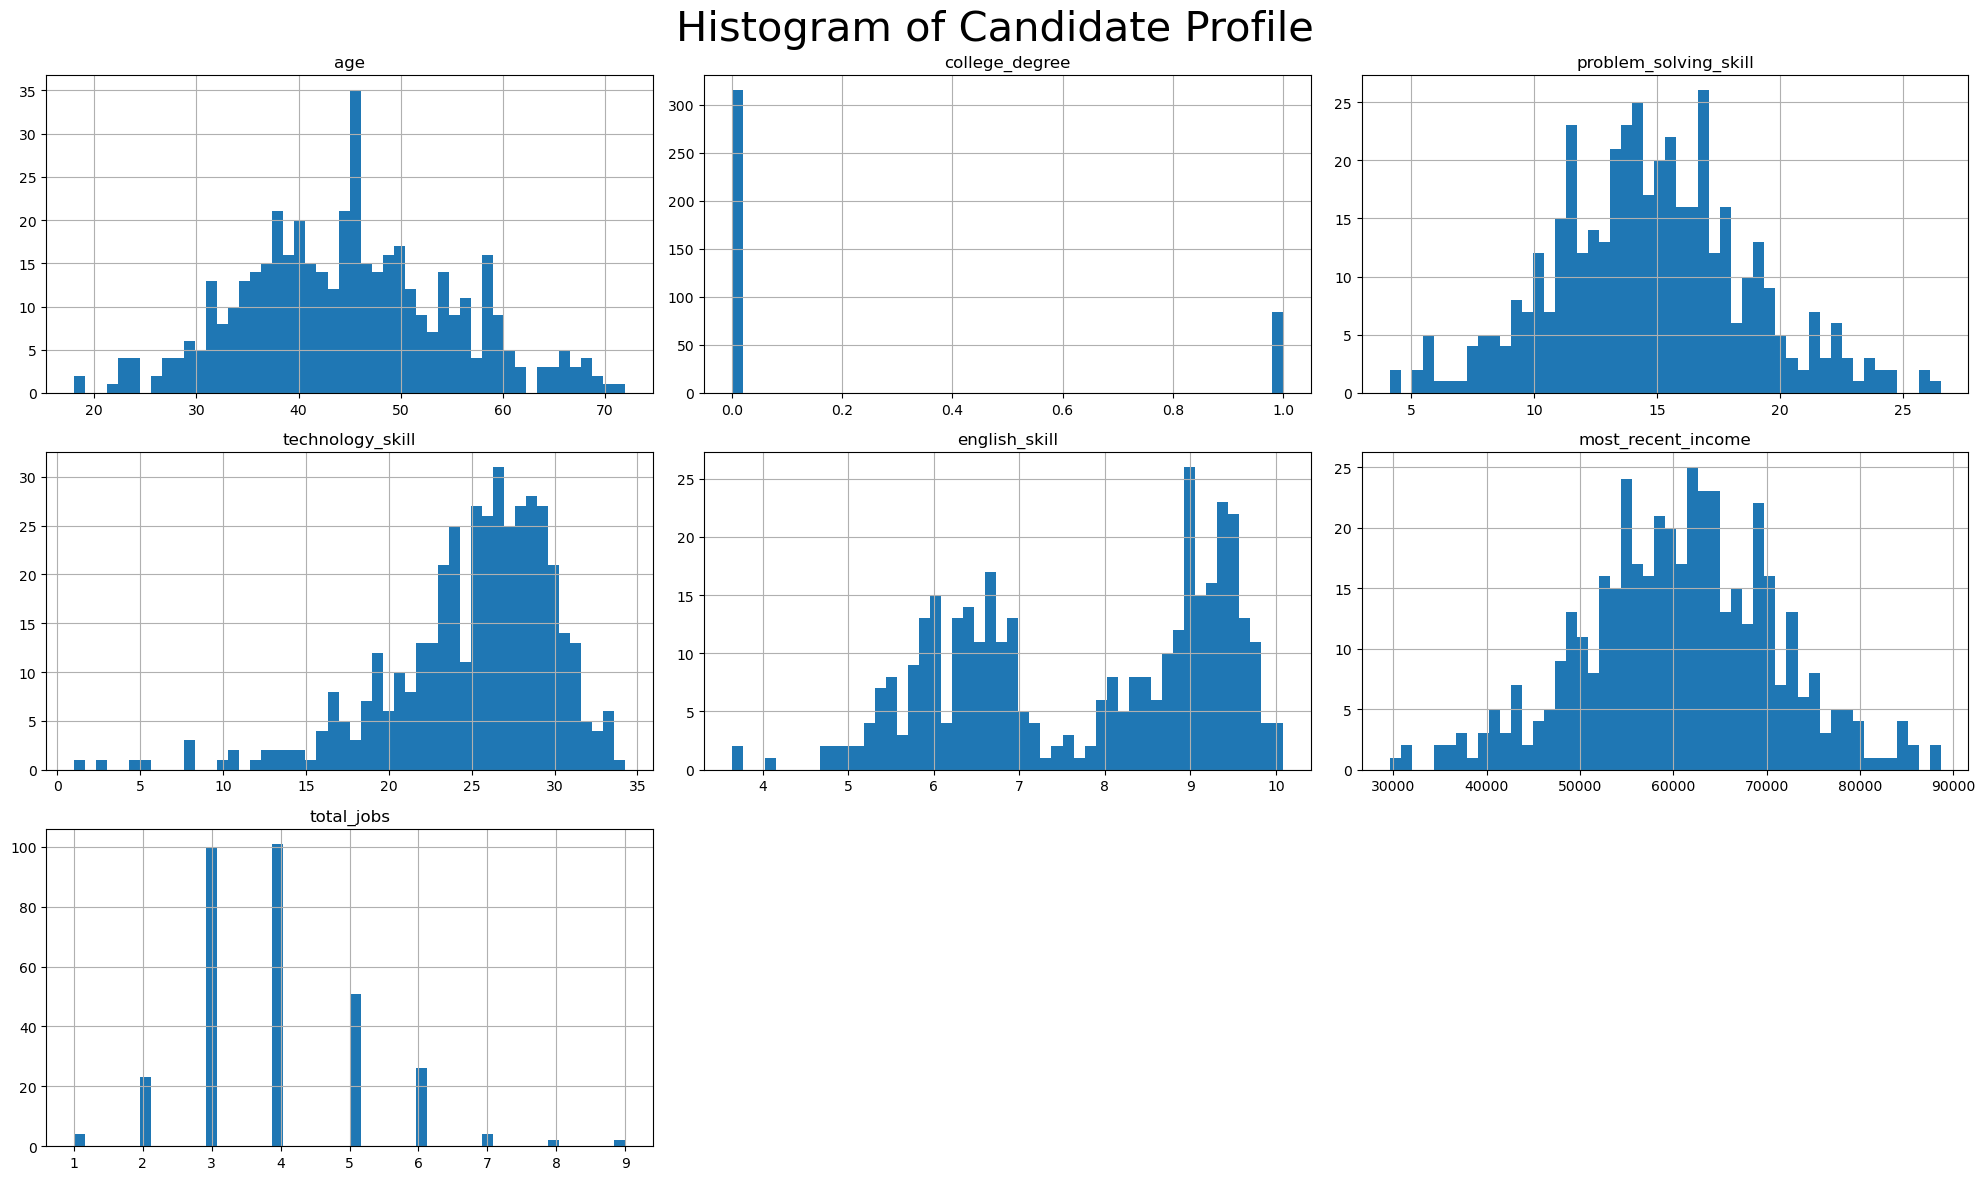

In [16]:
# y axis = Candidate frequency
# x axis = Candidate attributes
df_candidates.drop('wombus_id',axis=1).hist(bins=50, figsize=(20,12))
plt.suptitle('Histogram of Candidate Profile', fontsize=30)

# save histogram figure
save_fig('Candidates_histogram', cand_path)

In [17]:
# Scratch work
# (df_candidates['college_degree']==1).sum()
# df_candidates['technology_skill'].skew()

Here are the following insights from the candidates histograms (with the data loss):
* Age seems normally distributed, mean value of 45.
* Out of 449 candidates, about 85 candidates have college degrees.
* Problem_solving_skills [true scale = 0(best) to 30 (worst)] seems normally distributed, mean value of 14.7.
* Technology_skill shows a skew left distribution(-1.35), though it's only based range of 1(min)-34(max)... with most of the candidates' technological skill level lies near a mean score of 25, where true scale is from 1 (best) to 40 (worst).
* English_skill have a bimodal distribution, one peaks around 6.5 and around 9.2, on a scale of 0 (worst) to 10 (best).
* Most_recent_income is normally distributed, mean value of $60.5K.
* Most candidates had an average of 3-4 jobs prior to applying for Wombi.

Saving figure Candidate_tech_skill_dist


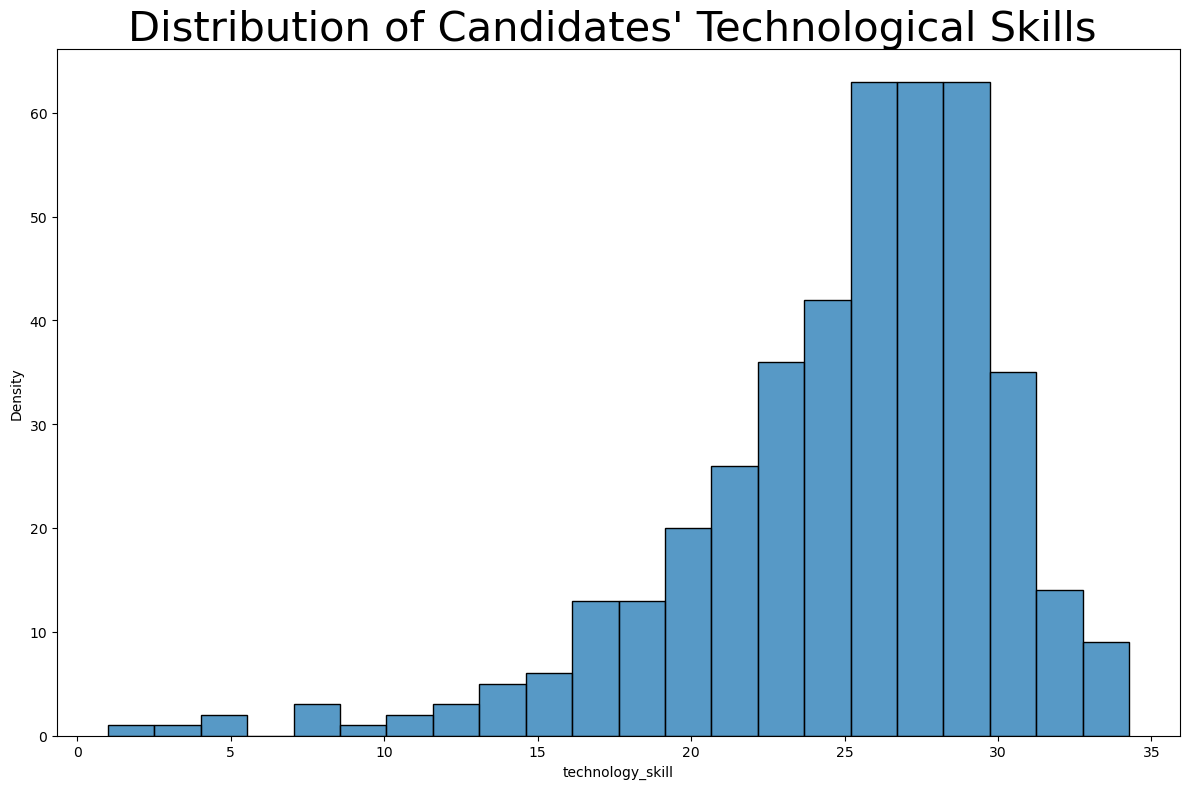

In [18]:
title= 'Distribution of Candidates\' Technological Skills '

#Create figure
fig, ax = plt.subplots(1, figsize=(12,8))
sns.histplot(df_candidates['technology_skill'], ax=ax)
ax.set(title='before log transformation', xlabel='technology_skill', ylabel='Density')
plt.title(title, fontsize=30)
save_fig('Candidate_tech_skill_dist', cand_path)
plt.show()

In [19]:
# Candidates preferred color for company swag
cand_color = pd.DataFrame(df_candidates['shirt_color_preference'].value_counts())
cand_color = cand_color.reset_index()
cand_color.columns = ['Color','Frequency']

# Candidates preferred industry field
cand_ind = pd.DataFrame(df_candidates['industry_preference'].value_counts())
cand_ind = cand_ind.reset_index()
cand_ind.columns = ['Industry','Frequency']

# Candidates preferred work style
cand_rem = pd.DataFrame(df_candidates['remote_work_preference'].value_counts())
cand_rem = cand_rem.reset_index()
cand_rem.columns = ['remote pref','Frequency']

# Candidates preferred color for Wombus birthplace
cand_loc = pd.DataFrame(df_candidates['birth_continent'].value_counts())
cand_loc = cand_loc.reset_index()
cand_loc.columns = ['Location','Frequency']

In [20]:
import plotly.express as px
fig = px.pie(cand_color, values='Frequency', names='Color',
             color_discrete_map={'Purple':'purple','Blue':'blue'},
            color_discrete_sequence=['purple','blue'],
            width=800, height=400)

fig.update_layout(
    title_text="Candidates' Preferred Company Swag Color",)
fig.update_traces(textinfo='percent+value')
fig.write_image("../images/candidate_profile/Candidate_pref_color.png", format='png',engine='kaleido')
fig.show()

In [21]:
import plotly.express as px
fig = px.pie(cand_ind, values='Frequency', names='Industry',
            width=800, height=400)
fig.update_layout(
    title_text="Candidates' Preferred Industry field",)
fig.update_traces(textinfo='percent+value')
fig.write_image("../images/candidate_profile/Candidate_pref_industry.png", format='png',engine='kaleido')
fig.show()

In [22]:
import plotly.express as px
fig = px.pie(cand_rem, values='Frequency', names='remote pref',
            width=800, height=400)

fig.update_layout(
    title_text="Candidates' Preferred Work Style",)
fig.update_traces(textinfo='percent+value')
fig.write_image("../images/candidate_profile/Candidate_pref_work.png", format='png',engine='kaleido')
fig.show()

In [23]:
import plotly.express as px
fig = px.pie(cand_loc, values='Frequency', names='Location',
            width=800, height=400)

fig.update_layout(
    title_text="Candidates' birthplace",)
fig.update_traces(textinfo='percent+value')
fig.write_image("../images/candidate_profile/Candidate_birthplace.png", format='png',engine='kaleido')
fig.show()

Candidates Preference insights:
* prefer purple over blue when choosing between two colors for the company swag.
* industry preferences is equally distributed
* Majority of candidates prefer a hybrid work-style
* Majority of candidates were born in North America, followed by Asia

Now we look into the candidates' categorical attributes that involves ranking from strongly disagree to strongly agree.
* customer experience
* work environment
* personal growth
* honest communication
* community services


In [24]:
df_candidates[['customer_exp_preference','work_env_preference','personal_growth_preference','honest_communication_preference','community_service_preference']].value_counts()

customer_exp_preference  work_env_preference  personal_growth_preference  honest_communication_preference  community_service_preference
Agree                    Strongly Agree       Agree                       Neutral                          Strongly Agree                  13
                         Disagree             Agree                       Neutral                          Strongly Agree                   9
Disagree                 Strongly Agree       Agree                       Neutral                          Strongly Agree                   8
Strongly Disagree        Strongly Agree       Agree                       Neutral                          Strongly Agree                   7
                         Disagree             Agree                       Neutral                          Strongly Agree                   7
                                                                                                                                           ..
Neutral     

In [25]:
cand_survey = df_candidates[['customer_exp_preference','work_env_preference','personal_growth_preference','honest_communication_preference','community_service_preference']].dropna()
cand_survey_cat = {'Strongly Disagree':1, "Disagree":2, "Neutral":3, "Agree":4, "Strongly Agree":5}
cand_freq = {}
for i in cand_survey.columns:
    cand_survey[i] = cand_survey[i].replace(cand_survey_cat)
for j in cand_survey.columns:
    cand_freq[j] = cand_survey[j].value_counts()

In [26]:
plot_cand_freq = pd.DataFrame(cand_freq).T
plot_cand_freq.head()

,1,2,3,4,5
customer_exp_preference,115,48,49,98,46
work_env_preference,38,100,70,12,136
personal_growth_preference,25,80,20,202,29
honest_communication_preference,35,36,200,15,70
community_service_preference,4,21,7,69,255


Saving figure Candidates_preferences


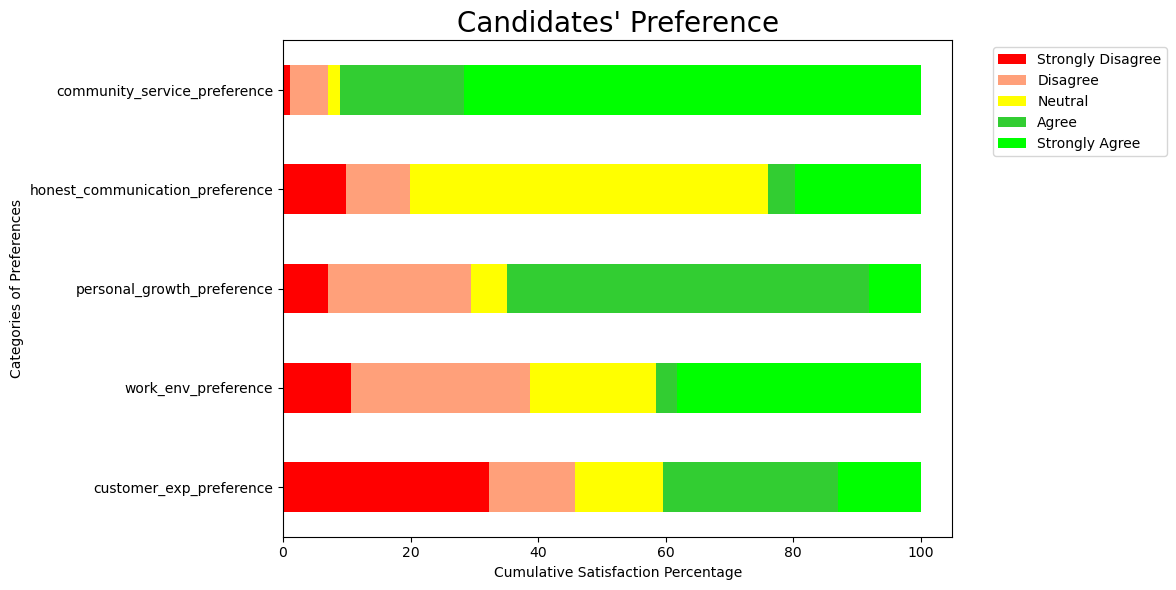

In [27]:
# Make the X axis a cumulative percentage instead of counts
cand_freqs = plot_cand_freq.div(plot_cand_freq.sum(axis=1), axis=0)*100

# Create the plot
color = ['red','lightsalmon','yellow','limegreen','lime']
cand_freqs.plot(kind='barh',stacked=True, color=color, figsize=(12,6))
plt.title('Candidates\' Preference', fontsize=20)
plt.xlabel('Cumulative Satisfaction Percentage')
plt.ylabel('Categories of Preferences')
plt.legend(cand_survey_cat, bbox_to_anchor=(1.05,1))
save_fig('Candidates_preferences', cand_path)
plt.show()

### 2.1.2 - Wombi Current Employees

In [28]:
df_employees = pd.read_csv('../data/wombi_employees.csv')
df_employees.head(3)

,wombus_id,birth_continent,gender,age,college_degree,problem_solving_skill,technology_skill,english_skill,most_recent_income,total_jobs,shirt_color_preference,customer_exp_preference,work_env_preference,personal_growth_preference,honest_communication_preference,community_service_preference,remote_work_preference,industry_preference,score
0,1554,North America,Male,51.0,NaN,NaN,31.522899,8.274305,"65,213",NaN,Purple,Strongly Disagree,Disagree,Agree,Strongly Agree,Strongly Agree,Hybrid,Renewable Energy,61.06
1,1555,North America,Female,48.0,0.0,17.016506,24.785969,9.426865,"54,693",NaN,Blue,Strongly Disagree,Strongly Agree,Strongly Agree,Disagree,Strongly Agree,Hybrid,Finance,53.20
2,1556,NaN,Female,47.0,0.0,NaN,27.225131,5.772313,"47,381",4.0,Purple,Agree,Agree,Agree,Neutral,Strongly Agree,On-Site,Finance,70.18


In [29]:
# Shape of dataset for Wombi current employees
df_employees.shape

(233936, 19)

In [30]:
# There are 19 columns in the dataset, with our predictor variable "SCORE"
df_employees.columns.value_counts().sum()

19

In [31]:
# Remember that most_recent_income is an object due to the comma, replace the dtype with int
df_employees['most_recent_income'] = df_employees['most_recent_income'].replace(',','', regex=True).apply(pd.to_numeric)

In [32]:
# Information of the employees dataframe, including the dtype
df_employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233936 entries, 0 to 233935
Data columns (total 19 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   wombus_id                        233936 non-null  int64  
 1   birth_continent                  222243 non-null  object 
 2   gender                           231593 non-null  object 
 3   age                              231599 non-null  float64
 4   college_degree                   205860 non-null  float64
 5   problem_solving_skill            224577 non-null  float64
 6   technology_skill                 212869 non-null  float64
 7   english_skill                    194172 non-null  float64
 8   most_recent_income               226915 non-null  float64
 9   total_jobs                       156725 non-null  float64
 10  shirt_color_preference           231596 non-null  object 
 11  customer_exp_preference          205863 non-null  object 
 12  wo

In [33]:
# employees dtypes that are 'numeric'
df_employees.select_dtypes(include=['number']).columns

Index(['wombus_id', 'age', 'college_degree', 'problem_solving_skill',
       'technology_skill', 'english_skill', 'most_recent_income', 'total_jobs',
       'score'],
      dtype='object')

In [34]:
# employees dtypes that are 'objects'
df_employees.select_dtypes(include=['object']).columns

Index(['birth_continent', 'gender', 'shirt_color_preference',
       'customer_exp_preference', 'work_env_preference',
       'personal_growth_preference', 'honest_communication_preference',
       'community_service_preference', 'remote_work_preference',
       'industry_preference'],
      dtype='object')

### 2.1.2a - Employee Data Visualization

In [35]:
# Descriptive Statistics of employees
df_employees.describe().T 

,count,mean,std,min,25%,50%,75%,max
wombus_id,233936.0,118521.500000,67531.650624,1554.000000,60037.750000,118521.500000,177005.250000,235489.00
age,231599.0,44.991822,9.976091,15.000000,38.000000,45.000000,52.000000,92.00
college_degree,205860.0,0.208802,0.406454,0.000000,0.000000,0.000000,0.000000,1.00
problem_solving_skill,224577.0,14.994757,3.797183,1.000000,12.441202,14.993988,17.555919,30.00
technology_skill,212869.0,25.420540,5.074806,1.000000,23.045138,26.380477,28.857932,40.00
english_skill,194172.0,7.647663,1.558431,1.311934,6.357023,7.931914,9.090198,10.25
most_recent_income,226915.0,60010.868506,9995.172460,14884.000000,53269.000000,60010.000000,66731.000000,102892.00
total_jobs,156725.0,3.897904,1.300534,0.000000,3.000000,4.000000,5.000000,10.00
score,233936.0,58.205192,8.142174,1.000000,52.760000,58.150000,63.620000,100.00


In [36]:
# Percentage of NaN values in the dataset
df_employees.isnull().sum()/len(df_employees)

wombus_id                          0.000000
birth_continent                    0.049984
gender                             0.010016
age                                0.009990
college_degree                     0.120016
problem_solving_skill              0.040007
technology_skill                   0.090055
english_skill                      0.169978
most_recent_income                 0.030012
total_jobs                         0.330052
shirt_color_preference             0.010003
customer_exp_preference            0.120003
work_env_preference                0.010003
personal_growth_preference         0.029974
honest_communication_preference    0.029991
community_service_preference       0.020027
remote_work_preference             0.080018
industry_preference                0.009998
score                              0.000000
dtype: float64

In [37]:
# We have 0 duplicates in our dataframe
df_employees.duplicated().sum()

0

#### 2.1.2a - Employee Data Visualization

Saving figure employees histogram


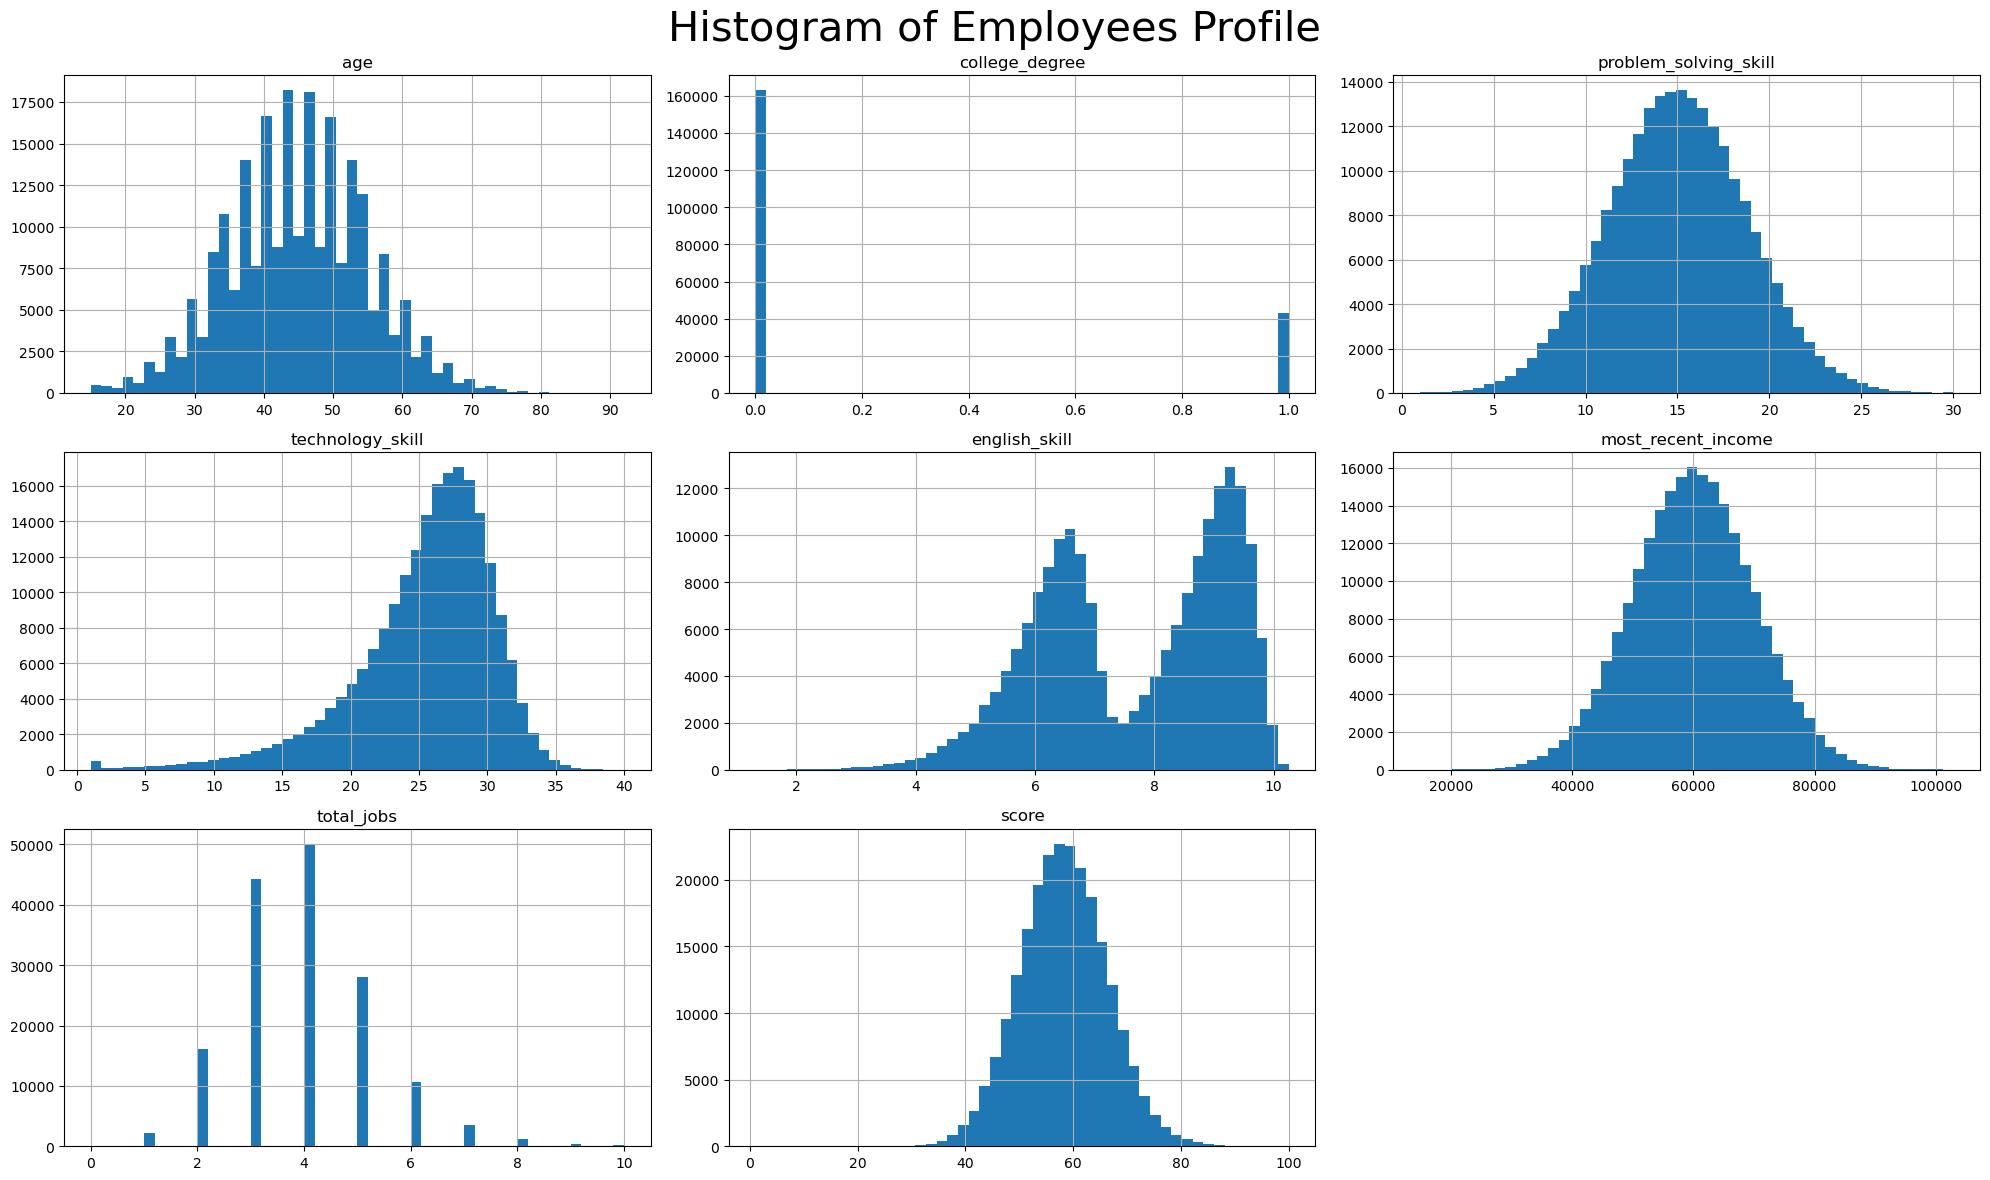

In [38]:
df_employees.drop('wombus_id',axis=1).hist(bins=50, figsize=(20,12))
plt.suptitle('Histogram of Employees Profile', fontsize=30)

# save histogram figure
save_fig('employees histogram', emp_path)

In [39]:
df_employees.shape

(233936, 19)

In [40]:
(df_employees['college_degree']==1).sum()/df_employees.shape[0]

0.18374256206825798

Similarly to the candidates' section, the following insights from the employees histogram (with the data loss) are:
* Age does seem to follow slightly normal distributions, mean value of 45
* Only 18 percent of the current Wombi employees have college degrees
* Technology skills... mean value of 25.4
* English skills has a bimodal distribution, slightly similar peaks with candidates dataset
* Most recent income is normally distributed around $60,000
* Most candidates have and average job of 4 prior to applying for Wombi

Comparing the two datasets: Candidates vs Employees, they follow similar trend with all of the numerical traits. This helps us understand that the candidates dataset can be used as stratified sampling from the employees dataset.

Saving figure Employees_tech_skill_dist


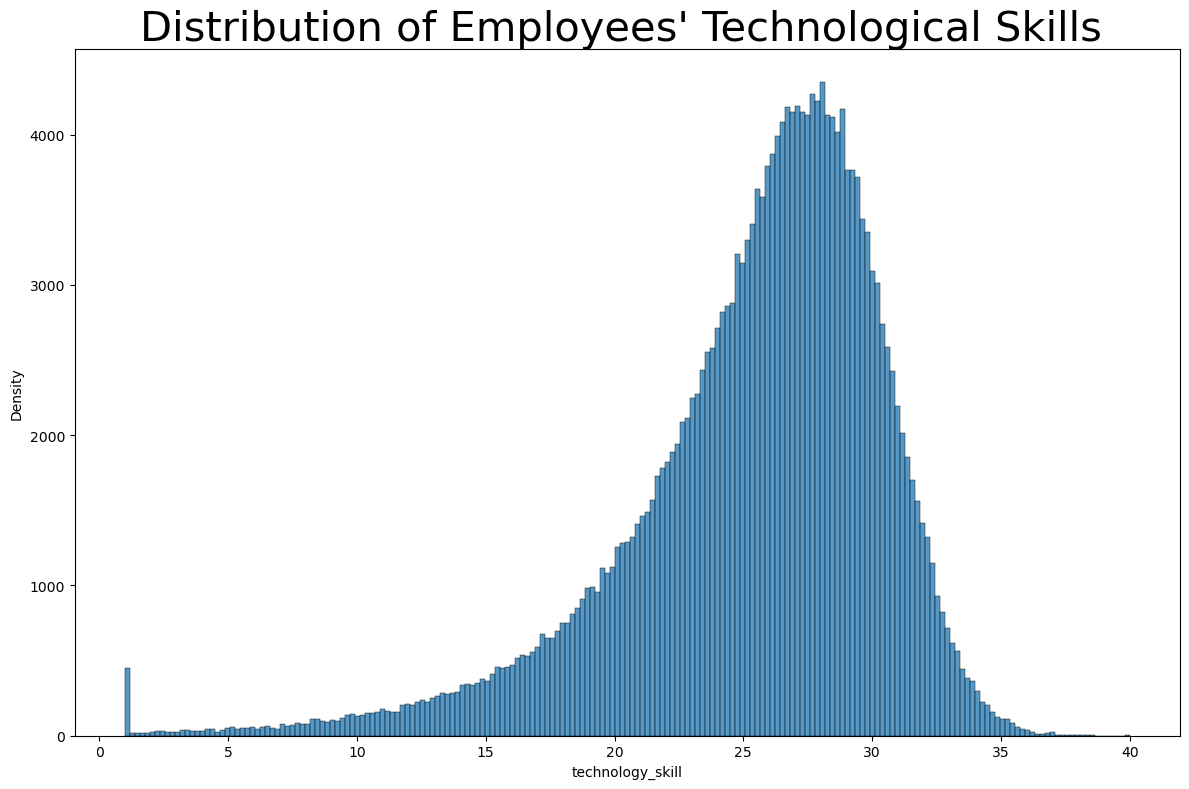

In [41]:
title= 'Distribution of Employees\' Technological Skills '

#Create figure
fig, ax = plt.subplots(1, figsize=(12,8))
sns.histplot(df_employees['technology_skill'], ax=ax)
ax.set(title='before log transformation', xlabel='technology_skill', ylabel='Density')
plt.title(title, fontsize=30)
save_fig('Employees_tech_skill_dist', emp_path)
plt.show()

In [42]:
# Employees preferred color for company swag
emp_color = pd.DataFrame(df_employees['shirt_color_preference'].value_counts())
emp_color = emp_color.reset_index()
emp_color.columns = ['Color','Frequency']

# Employees preferred industry field
emp_ind = pd.DataFrame(df_employees['industry_preference'].value_counts())
emp_ind = emp_ind.reset_index()
emp_ind.columns = ['Industry','Frequency']

# Employees preferred work style
emp_rem = pd.DataFrame(df_employees['remote_work_preference'].value_counts())
emp_rem = emp_rem.reset_index()
emp_rem.columns = ['remote pref','Frequency']

# Employees preferred color for Wombus birthplace
emp_loc = pd.DataFrame(df_employees['birth_continent'].value_counts())
emp_loc = emp_loc.reset_index()
emp_loc.columns = ['Location','Frequency']

In [43]:
import plotly.express as px
fig = px.pie(emp_color, values='Frequency', names='Color',
             color_discrete_map={'Purple':'purple','Blue':'blue'},
            color_discrete_sequence=['purple','blue'],
            width=800, height=400)

fig.update_layout(
    title_text="Employees' Preferred Company Swag Color",)
fig.update_traces(textinfo='percent+value')
fig.write_image("../images/employee_profile/employee_pref_color.png", format='png',engine='kaleido')
fig.show()

In [44]:
import plotly.express as px
fig = px.pie(emp_ind, values='Frequency', names='Industry',
            width=800, height=400)
fig.update_layout(
    title_text="Employees' Preferred Industry field",)
fig.update_traces(textinfo='percent+value')
fig.write_image("../images/employee_profile/employee_pref_industry.png", format='png',engine='kaleido')
fig.show()

In [45]:
import plotly.express as px
fig = px.pie(emp_rem, values='Frequency', names='remote pref',
            width=800, height=400)

fig.update_layout(
    title_text="Employees' Preferred Work Style",)
fig.update_traces(textinfo='percent+value')
fig.write_image("../images/employee_profile/employee_pref_work.png", format='png',engine='kaleido')
fig.show()

In [46]:
import plotly.express as px
fig = px.pie(emp_loc, values='Frequency', names='Location',
            width=800, height=400)

fig.update_layout(
    title_text="Employees' birthplace",)
fig.update_traces(textinfo='percent+value')
fig.write_image("../images/employee_profile/employee_birthplace.png", format='png',engine='kaleido')
fig.show()

Employees preference insight:
* Employees prefer purple over blue when choosing between two colors for the company swag.
* industry preferences is equally distributed
* Majority of employees prefer a hybrid work-style
* Majority of employees were born in North America, followed by Asia

Now we look into the employees' categorical attributes that involves ranking from strongly disagree to strongly agree.
* customer experience
* work environment
* personal growth
* honest communication
* community services

In [47]:
df_employees[['customer_exp_preference','work_env_preference','personal_growth_preference','honest_communication_preference','community_service_preference']].value_counts()

customer_exp_preference  work_env_preference  personal_growth_preference  honest_communication_preference  community_service_preference
Strongly Disagree        Strongly Agree       Agree                       Neutral                          Strongly Agree                  5348
Agree                    Strongly Agree       Agree                       Neutral                          Strongly Agree                  4412
Strongly Disagree        Disagree             Agree                       Neutral                          Strongly Agree                  3864
Agree                    Disagree             Agree                       Neutral                          Strongly Agree                  3344
Strongly Disagree        Neutral              Agree                       Neutral                          Strongly Agree                  2757
                                                                                                                                           ... 


In [48]:
emp_survey = df_employees[['customer_exp_preference','work_env_preference','personal_growth_preference','honest_communication_preference','community_service_preference']].dropna()
emp_survey_cat = {'Strongly Disagree':1, "Disagree":2, "Neutral":3, "Agree":4, "Strongly Agree":5}
emp_freq = {}
for i in emp_survey.columns:
    emp_survey[i] = emp_survey[i].replace(emp_survey_cat)
for j in emp_survey.columns:
    emp_freq[j] = emp_survey[j].value_counts()

In [49]:
plot_emp_freq = pd.DataFrame(emp_freq).T
plot_emp_freq.head()

,1,2,3,4,5
customer_exp_preference,59681,26472,26549,50829,24392
work_env_preference,24584,50652,35645,7611,69431
personal_growth_preference,13175,39384,11418,107149,16797
honest_communication_preference,22724,15142,108784,7553,33720
community_service_preference,1927,11506,3802,33841,136847


Saving figure Employees_preferences


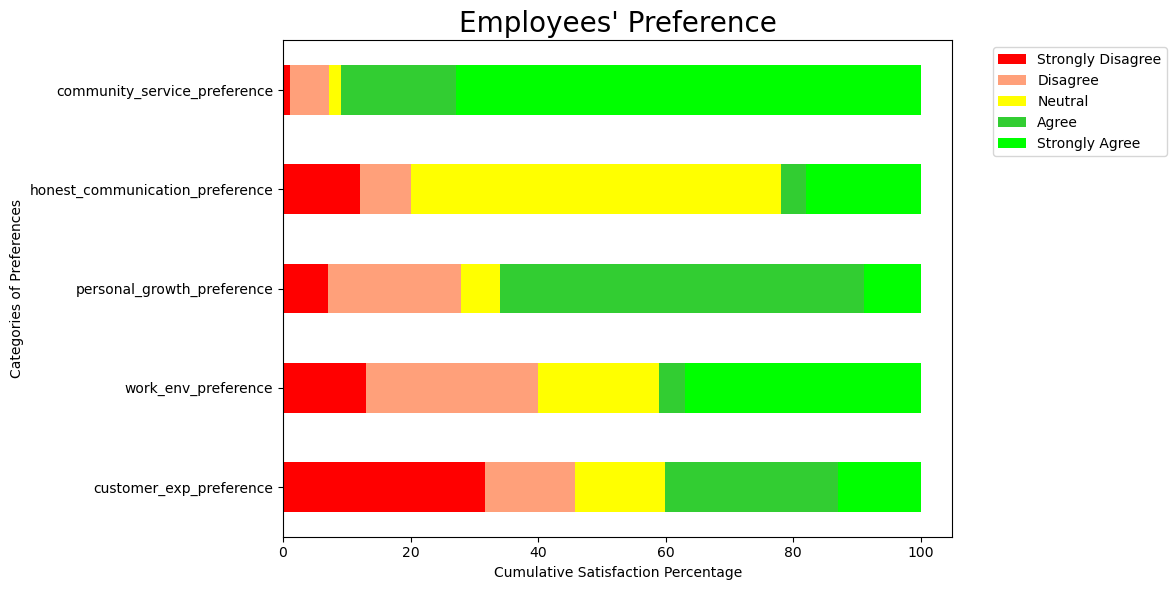

In [50]:
# Make the X axis a cumulative percentage instead of counts
emp_freqs = plot_emp_freq.div(plot_emp_freq.sum(axis=1), axis=0)*100

# Create the plot
color = ['red','lightsalmon','yellow','limegreen','lime']
emp_freqs.plot(kind='barh',stacked=True, color=color, figsize=(12,6))
plt.title('Employees\' Preference', fontsize=20)
plt.xlabel('Cumulative Satisfaction Percentage')
plt.ylabel('Categories of Preferences')
plt.legend(emp_survey_cat, bbox_to_anchor=(1.05,1))
save_fig('Employees_preferences', emp_path)
plt.show()

In [51]:
df_employees.columns

Index(['wombus_id', 'birth_continent', 'gender', 'age', 'college_degree',
       'problem_solving_skill', 'technology_skill', 'english_skill',
       'most_recent_income', 'total_jobs', 'shirt_color_preference',
       'customer_exp_preference', 'work_env_preference',
       'personal_growth_preference', 'honest_communication_preference',
       'community_service_preference', 'remote_work_preference',
       'industry_preference', 'score'],
      dtype='object')

In [52]:
# Pearson Coefficient of 'Score' Correlation
df_employees.dropna().corr(numeric_only=True)['score'].sort_values(ascending=False)

score                    1.000000
most_recent_income       0.326398
age                      0.106988
english_skill            0.039071
college_degree           0.003485
wombus_id               -0.003313
total_jobs              -0.011278
technology_skill        -0.017470
problem_solving_skill   -0.326410
Name: score, dtype: float64

Saving figure heatmap_correlation


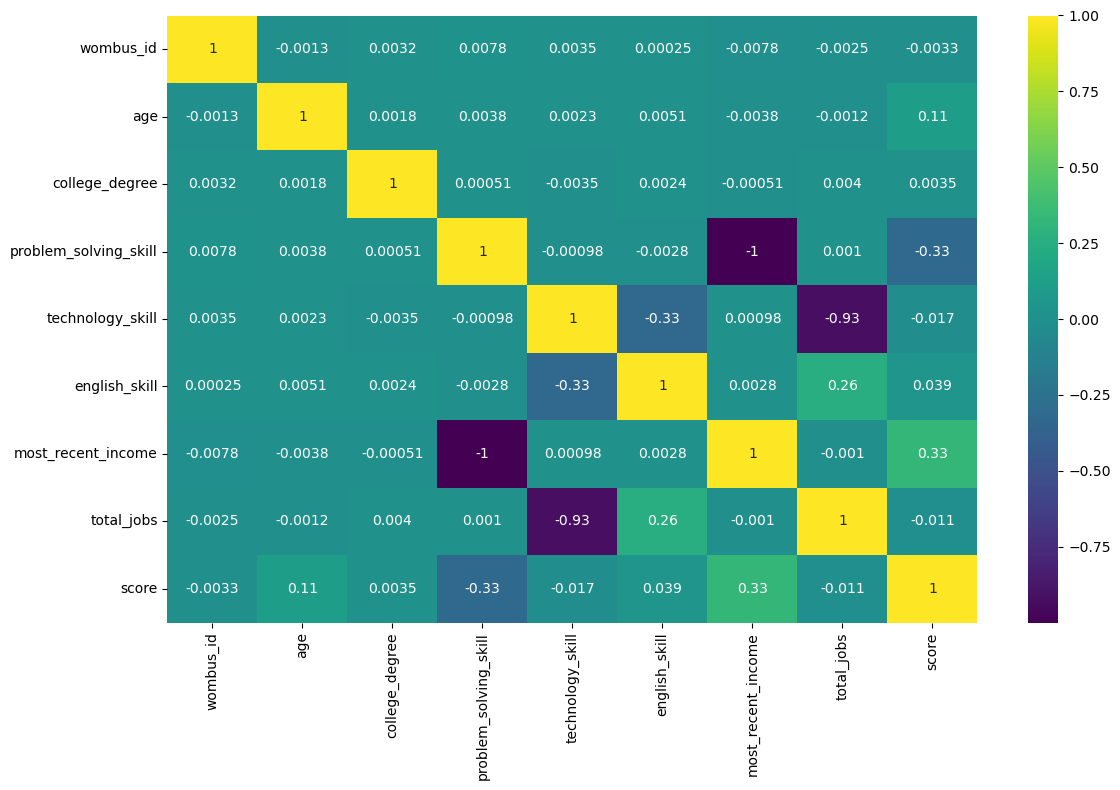

In [53]:
#Visual of Pearson Coefficient (sns heatmap)
plt.figure(figsize=(12,8))
sns.heatmap(df_employees.dropna().corr(numeric_only=True), annot=True, cmap='viridis')
save_fig('heatmap_correlation',emp_path)
plt.show()

Saving figure pearson_corr


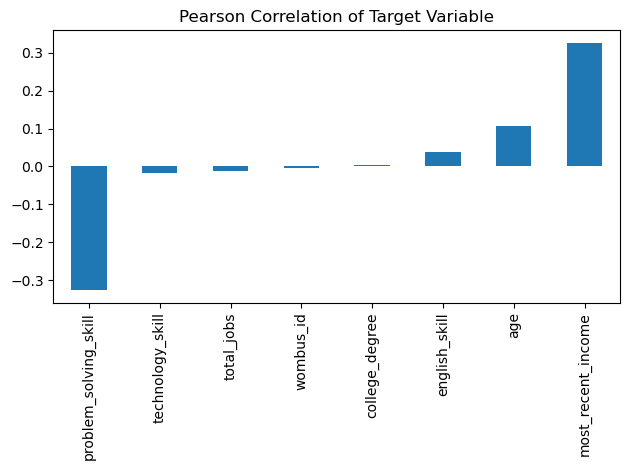

In [54]:
#Visual of Pearson Coefficient
df_employees.dropna().corr(numeric_only=True)['score'].sort_values().drop('score').plot(kind='bar')
plt.title('Pearson Correlation of Target Variable')
save_fig('pearson_corr',emp_path)

Pearson Coefficient:
* Most recent income and problem solving skills seems highly correlated with "score" than the other attributes
* Total jobs and technology skills are highly correlated with each other, we need to check for multi-collinearity and remove
* Problem_solving_skills and most_recent_income are highly correlated with each other, we DEFINITELY need to check for multi-collinearity

#### 2.1.2b - Multicollinearity

In [55]:
# We need to create a new dataframe consisting only numeric attributes... no categoricals
df = df_employees[df_employees.select_dtypes(include=['number']).columns].drop(['wombus_id'], axis=1)
df = df.dropna()

In [56]:
# One of the ways to measure multi-collinearity is VIF... One of the features is heavily showing 
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_scores(df):
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independent Features"] = df.columns
    VIF_Scores["VIF Scores"] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return VIF_Scores
df1 = df.iloc[:,:-1]
vif_scores(df1)

,Independent Features,VIF Scores
0,age,21.225075
1,college_degree,1.265348
2,problem_solving_skill,98.948672
3,technology_skill,194.919623
4,english_skill,28.867277
5,most_recent_income,212.565529
6,total_jobs,71.274473


In [57]:
# Adding a threshold value to limit the effects of multi-collinearity.. 0.6
def correlation(df, threshold):
    correlated_cols = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                correlated_cols.add(colname)
    return correlated_cols

In [58]:
# Drop these two columns in the main employees dataset
correlation(df, 0.6)

{'most_recent_income', 'total_jobs'}

In [59]:
df = df.drop(correlation(df, 0.6),axis=1)

In [60]:
# Now we have a normal VIF score compared to extreme values of over 100 in the beginning VIF assessment
df1 = df.iloc[:,:-1]
vif_scores(df1)

,Independent Features,VIF Scores
0,age,17.453144
1,college_degree,1.262440
2,problem_solving_skill,14.286137
3,technology_skill,16.184928
4,english_skill,15.857348


## 3 - Data Preprocessing

#### 3.1 Split the dataset
Here, we're going to split our dataset between target variable and predictor attributes

In [61]:
from sklearn.model_selection import train_test_split
X = df_employees.drop('score',axis=1)
y = df_employees['score']

We're going to perform data wrangling and convert categorical string attributes to dummy variables through one-hot encoding... <br>But before that, let's remove those two attributes from the multicollinearity portion.<br>
Also going to remove wombus_id, since it doesn't tell us anything other than its unique identifier

In [62]:
# Normally we drop like below, but we will drop with sklearn pipeline feature

# X = X.drop(['wombus_id','most_recent_income','total_jobs'],axis=1)

In [63]:
#Check the length of X dataframe
len(X)

233936

Find the percentage of missing values in X dataframe

In [64]:
# Gives us the percentage of missing values in our X dataframe
X.isnull().sum()/len(X)*100

wombus_id                           0.000000
birth_continent                     4.998376
gender                              1.001556
age                                 0.998991
college_degree                     12.001573
problem_solving_skill               4.000667
technology_skill                    9.005454
english_skill                      16.997811
most_recent_income                  3.001248
total_jobs                         33.005181
shirt_color_preference              1.000274
customer_exp_preference            12.000291
work_env_preference                 1.000274
personal_growth_preference          2.997401
honest_communication_preference     2.999111
community_service_preference        2.002684
remote_work_preference              8.001761
industry_preference                 0.999846
dtype: float64

Later on, we're creating a pipeline that will fill the following with mean value through SimpleImputer, with mean strategy.
* problem_solving_skill
* english_skill
* technology_skill

In [65]:
# Better way to impliment this is through sklearn pipeline, but you can use below too.

# X['problem_solving_skill'] = X['problem_solving_skill'].replace(np.nan,X['problem_solving_skill'].mean())
# X['english_skill'] = X['english_skill'].replace(np.nan, X['english_skill'].mean())
# X['technology_skill'] = X['technology_skill'].replace(np.nan, X['technology_skill'].mean())

Let's fill the other numerical/categorical features with their most frequent categories...<br>
refer to file path location ---->  ../images/employee_profile 

In [66]:
# Better way to impliment this is through sklearn pipeline, but you can use below too.

# X['shirt_color_preference'] = X['shirt_color_preference'].replace(np.nan,'Purple')
# X['work_env_preference'] = X['work_env_preference'].replace(np.nan, 'Strongly Agree')
# X['personal_growth_preference'] = X['personal_growth_preference'].replace(np.nan, 'Agree')
# X['honest_communication_preference'] = X['honest_communication_preference'].replace(np.nan, 'Neutral')
# X['community_service_preference'] = X['community_service_preference'].replace(np.nan,'Strongly Agree')
# X['industry_preference'] = X['industry_preference'].replace(np.nan,'Tech')
# X['birth_continent'] = X['birth_continent'].replace(np.nan,'North America')
# X['remote_work_preference'] = X['remote_work_preference'].replace(np.nan,"Hybrid")
# X['gender'] = X['gender'].replace(np.nan,'Female')
# X['customer_exp_preference'] = X['customer_exp_preference'].replace(np.nan,'Neutral')
# X['college_degree'] = X['college_degree'].replace(np.nan,0).astype('int')
# X['age'] = X['age'].replace(np.nan,int(df_employees['age'].mean())).astype('int')

We separate our X features into seperate numerical attributes and categorical attributes (some require one-hot encoding and some require ordinal encoding)

In [67]:
# print(X.select_dtypes(include=['number']).columns)
X_num = X[['age', 'college_degree', 'problem_solving_skill', 'technology_skill',
       'english_skill','wombus_id','most_recent_income','total_jobs']]
# print(X.select_dtypes(include=['object']).columns)
X_ohe_cat = X[['birth_continent', 'gender', 'shirt_color_preference',
              'remote_work_preference','industry_preference']]
X_ord_cat = X[['customer_exp_preference', 'work_env_preference',
              'personal_growth_preference', 'honest_communication_preference',
              'community_service_preference']]

In [68]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
wombus_id,233936.0,118521.500000,67531.650624,1554.000000,60037.750000,118521.500000,177005.250000,235489.00
age,231599.0,44.991822,9.976091,15.000000,38.000000,45.000000,52.000000,92.00
college_degree,205860.0,0.208802,0.406454,0.000000,0.000000,0.000000,0.000000,1.00
problem_solving_skill,224577.0,14.994757,3.797183,1.000000,12.441202,14.993988,17.555919,30.00
technology_skill,212869.0,25.420540,5.074806,1.000000,23.045138,26.380477,28.857932,40.00
english_skill,194172.0,7.647663,1.558431,1.311934,6.357023,7.931914,9.090198,10.25
most_recent_income,226915.0,60010.868506,9995.172460,14884.000000,53269.000000,60010.000000,66731.000000,102892.00
total_jobs,156725.0,3.897904,1.300534,0.000000,3.000000,4.000000,5.000000,10.00


In [69]:
# Check to see if there are any remaining null values besides the numerical attributes... if none, proceed onwards!
X.isnull().sum()/len(X)*100

wombus_id                           0.000000
birth_continent                     4.998376
gender                              1.001556
age                                 0.998991
college_degree                     12.001573
problem_solving_skill               4.000667
technology_skill                    9.005454
english_skill                      16.997811
most_recent_income                  3.001248
total_jobs                         33.005181
shirt_color_preference              1.000274
customer_exp_preference            12.000291
work_env_preference                 1.000274
personal_growth_preference          2.997401
honest_communication_preference     2.999111
community_service_preference        2.002684
remote_work_preference              8.001761
industry_preference                 0.999846
dtype: float64

#### 3.2 - Create the Preprocessing Pipeline

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import make_column_transformer

In [71]:
# print(X.select_dtypes(include=['number']).columns)
X_num = X[['age', 'college_degree', 'problem_solving_skill', 'technology_skill',
       'english_skill']]
# print(X.select_dtypes(include=['object']).columns)
X_ohe_cat = X[['birth_continent', 'gender', 'shirt_color_preference',
              'remote_work_preference','industry_preference']]
X_ord_cat = X[['customer_exp_preference', 'work_env_preference',
              'personal_growth_preference', 'honest_communication_preference',
              'community_service_preference']]

In [72]:
# Create the numerical pipeline
num_pipeline = make_column_transformer(
       (SimpleImputer(strategy="most_frequent"),['age','college_degree']),
       (SimpleImputer(strategy="mean"),['problem_solving_skill', 'technology_skill','english_skill']),remainder='drop')

# Create the categorical pipeline for both one-hot encoding and ordinal encoding
cat_ohe_pipeline = Pipeline([
                    ('imputer',SimpleImputer(strategy='most_frequent'))
                    ,('ohe',OneHotEncoder())])
cat_ord_pipeline = Pipeline([
                    ('imputer',SimpleImputer(strategy='most_frequent')),
                    ('ordinal',OrdinalEncoder())])

In [73]:
# Add standardscaler to the numeric pipeline
num_pipeline1 = Pipeline([('imp_num_pipeline',num_pipeline),
                        ('scaler',StandardScaler())])

In [74]:
# Testing... keep this block for backup
# Create the numerical pipeline... remember we're passing the numerical attributes from our X dataset here. 
# num_pipeline = Pipeline([
                # ('imputer',SimpleImputer(strategy='median')),
                # ('std_scaler',StandardScaler())
# ])
# Create the categorical pipeline for both one-hot encoding and ordinal encoding
# cat_ohe_pipeline = Pipeline([
#                     ('imputer',SimpleImputer(strategy='most_frequent'))
#                     ,('ohe',OneHotEncoder())
# ])

# cat_ord_pipeline = Pipeline([
#                     ('imputer',SimpleImputer(strategy='most_frequent')),
#                     ('ordinal',OrdinalEncoder())
# ])

#Uncomment below if you want to see the transformation ### IGNORE ###
# X_num_tr = num_pipeline.fit_transform(X_num)
# X_num_tr

In [75]:
# Use ColumnTransformer to combine pipelines and create a workflow for the ML process
from sklearn.compose import ColumnTransformer

num_attribs = list(X_num)
cat_ohe_attribs = list(X_ohe_cat)
cat_ord_attribs = list(X_ord_cat)

# print(num_attribs)
# print(cat_ohe_attribs)
# print(cat_ord_attribs)

full_pipeline = ColumnTransformer([
            ('num', num_pipeline1, num_attribs),
            ('cat_ohe', cat_ohe_pipeline,cat_ohe_attribs),
            ('cat_ord',cat_ord_pipeline,cat_ord_attribs)])

In [76]:
full_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imp_num_pipeline',
                                                  ColumnTransformer(transformers=[('simpleimputer-1',
                                                                                   SimpleImputer(strategy='most_frequent'),
                                                                                   ['age',
                                                                                    'college_degree']),
                                                                                  ('simpleimputer-2',
                                                                                   SimpleImputer(),
                                                                                   ['problem_solving_skill',
                                                                                    'technology_skill',
                                                                                    'english_skill'])])),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'college_degree',
                                  'pro...
                                 ['birth_continent', 'gender',
                                  'shirt_color_preference',
                                  'remote_work_preference',
                                  'industry_preference']),
                                ('cat_ord',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinal',
                                                  OrdinalEncoder())]),
                                 ['customer_exp_preference',
                                  'work_env_preference',
                                  'personal_growth_preference',
                                  'honest_communication_preference',
                                  'community_service_preference'])])

In [77]:
# fit transform your X
X_prepared = full_pipeline.fit_transform(X)

Now we can test it on a random, simple algorithm to verify that it works

In [78]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_prepared,y)

LinearRegression()

In [79]:
# Your predictions
lin_reg.predict(X_prepared)[:5]

array([56.52441406, 54.20214844, 63.47338867, 58.74804688, 59.92675781])

In [80]:
# The true y value
y.head(5).to_numpy()

array([61.06, 53.2 , 70.18, 58.37, 61.77])

That's not really bad for linear regression, considering it's on default parameters and I haven't used K-Fold CV yet. I'll do the evaluation on the K-fold CV with metric: RMSE score

## 4 - Model Selection

#### 4.1 - K-Fold Cross Validation

First, let's do a train_test_split with our transformed data, this is for the K-Fold CV.

In [81]:
# Split the the dataset into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X_prepared,y,test_size=0.2, random_state=2)

In [82]:
# print the shape of each set to verify correct dimensions
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(187148, 27) (46788, 27) (187148,) (46788,)


Import all the model algorithm with KFold, cross_val_score, and even GridSearchCV for optimization

In [83]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

from keras.optimizers import SGD

Here, we will create a list of regression models with the ML algorithm with their name so it's easier to track from the for-loop.

In [84]:
models = []
# models.append(('LR', LinearRegression()))
# models.append(('LASSO', Lasso()))
# models.append(('RIDGE', Ridge()))
# models.append(('EN', ElasticNet()))
# models.append(('Dec Tree', DecisionTreeRegressor()))
# models.append(('KNeigh', KNeighborsRegressor()))
# models.append(('SVR',SVR()))
# models.append(('RF', RandomForestRegressor()))
# models.append(('GBR', GradientBoostingRegressor()))
# models.append(('ETR', ExtraTreesRegressor()))
# models.append(('ABR', AdaBoostRegressor()))
models.append(('NN', MLPRegressor()))

In [85]:
# Let's have K-Fold = 10... with a scoring metric of RMSE
num_folds = 10
scoring='neg_mean_squared_error'

The code below creates a loop for the K-Fold CV that passes through all the ML algorithms from our list of models

In [86]:
names = []
kfold_results = []
test_results = []
train_results = []
for name, model in models:
    names.append(name)

    # K-fold Analysis:
    kfold = KFold(n_splits=num_folds)

    # convert MSE to positive. The lower the bettter
    cv_results = -1*cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    cv_results = np.sqrt(cv_results)
    kfold_results.append(cv_results)

    # Full training 
    res = model.fit(X_train, y_train)
    train_result = mean_squared_error(res.predict(X_train), y_train)
    train_result = np.sqrt(train_result)
    train_results.append(train_result)

    # Test results
    test_result = mean_squared_error(res.predict(X_test), y_test)
    test_result = np.sqrt(test_result)
    test_results.append(test_result)

    msg = "%s, %f (%f) %f %f" % (name, cv_results.mean(), cv_results.std(), train_result, test_result)
    print(msg)

NN, 3.955258 (0.029684) 3.928995 3.973511


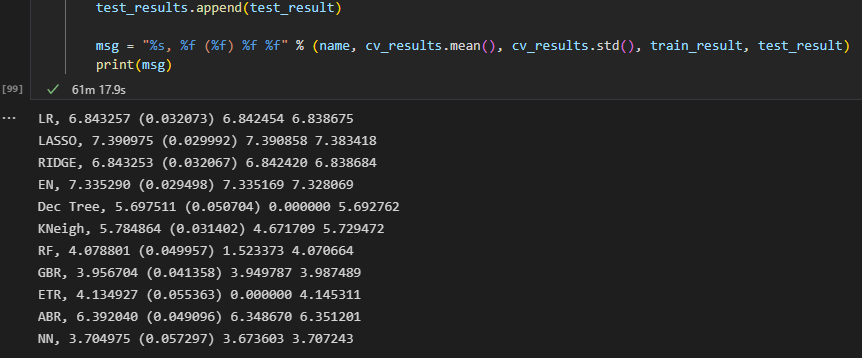

I took a snapshot (shown above) because I don't wish to undergo 1 hour per K-fold CV runs everytime I need to restart my kernel... I'll comment out the other algorithms, but feel free to uncomment if you want to check the algorithm comparison.
<br> KNeigh, RF, ETR had a long train time, just a heads up.<br><br>
Anyways, so we can see that Neural Network seems to outperform all the other algorithms, but let's take a look at it visually instead of seeing raw data.

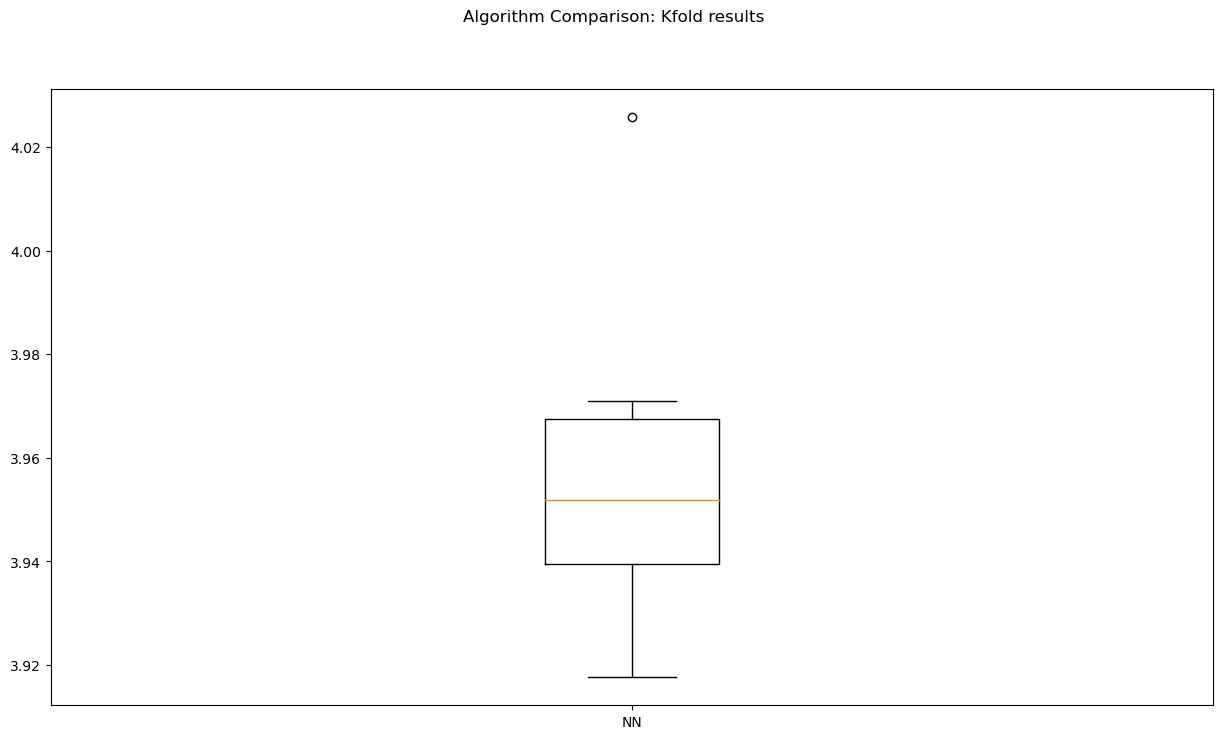

In [87]:
# Plotting the Algorithm Comparison: K-Fold CV results
fig = plt.figure()
fig.suptitle('Algorithm Comparison: Kfold results')
ax = fig.add_subplot(111)
plt.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
# save_fig('Kfold_Algorithm_Comparison',model_path)
plt.show()

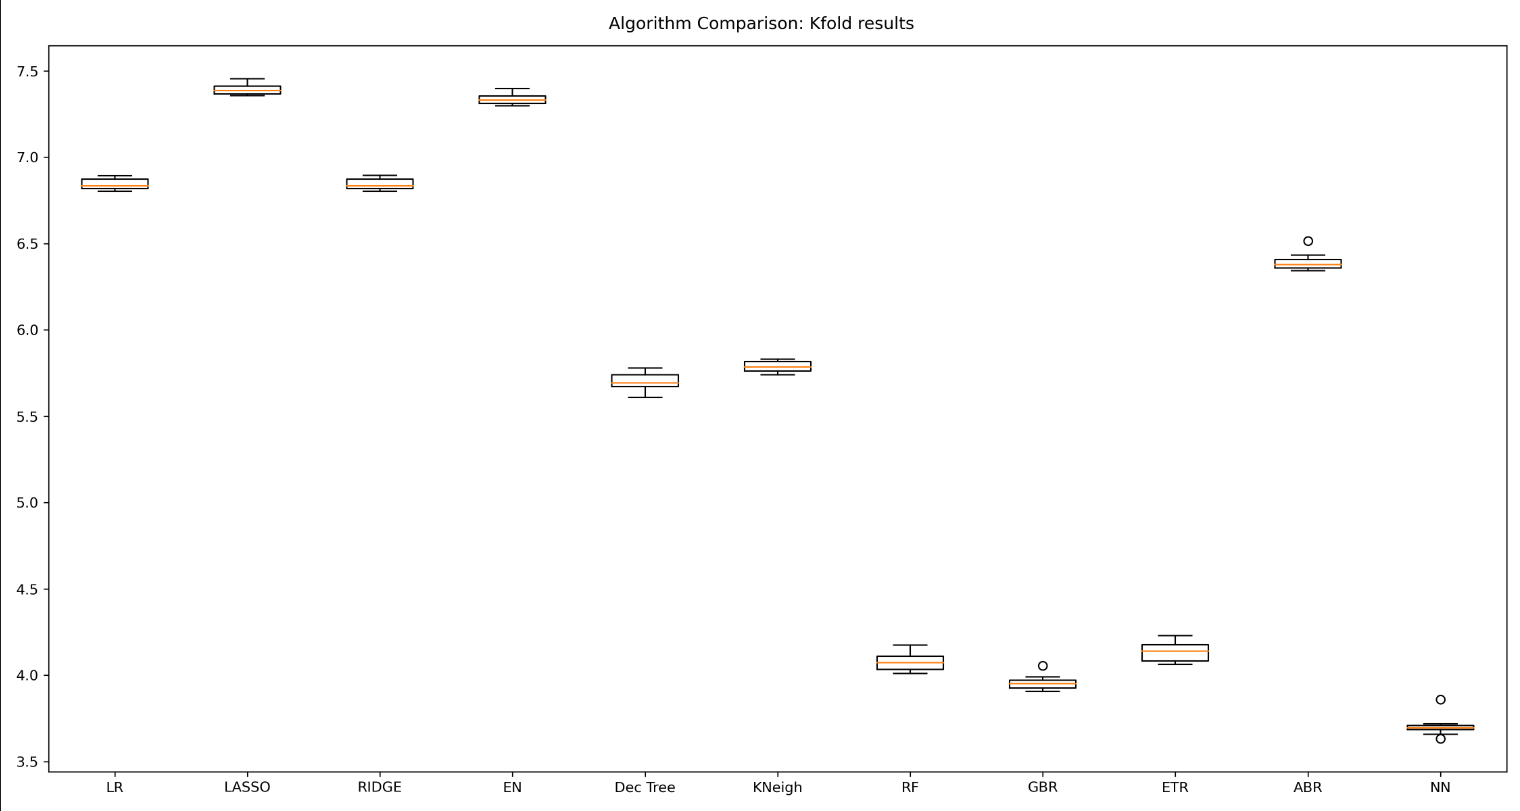

In [88]:
# Again, I took a snapshot that showed all the algorithms against each other

Insights from the K-Fold CV on default model parameters:
* Linear Regression, Lasso, Ridge, Ensemble, Decision Tree, K-Nearest Neighbors, and Adaboost Regressor seems to have performed poorly with our dataset
* Random Forest, Gradient Boost Regressor, and Extra Tree Regressor seems to have performed ok, good options
* Best option amongst all of the model is the MLP regressor (Multi-layer Perceptron Regressor)

We've found our model algorithm of interest, so we will add this to the pipeline for further optimization.

### 4.2 - GridSearch Cross Validation

In [89]:
# Check documentation for all parameter scope of MLPRegressor
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html
# MLPRegressor?

We need to give a range of sequence within the algorithm parameter, so we can see which combination will best reduce our RMSE value even more. FINE TUNING <br>
This is entirely up to the users on how they approach this, there is no right or wrong answer.

In [90]:
# uncomment below if you want to run the GridSearch CV. Be warned, it took 215 minutes...

# hidden_layers_sizes = [150,200,300] #default 100
# activation = ['sgd','relu'] #default relu
# solver = ['adam'] #default adam
# alpha = [0.0001,0.0005]
# batch_size = [128]
# learning_rate_init = [0.001,0.01]

# param_grid = dict(hidden_layer_sizes=hidden_layers_sizes, activation=activation, solver=solver,
#             batch_size=batch_size)
# model = MLPRegressor()
# grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', return_train_score=True)
# grid_result = grid.fit(X_train,y_train)

In [91]:
# uncomment below IF YOU RAN THE CODE ABOVE...

# print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# ranks = grid_result.cv_results_['rank_test_score']
# for mean, stdev, param, rank in zip(means, stds, params, ranks):
#     print('#%d %f (%f) with %r' % (rank, np.sqrt(-mean), np.sqrt(-stdev), param))

In [92]:
# If you want to see it neat
# uncomment below if you ran the GridSearchCV in general.

# print(" Results from Grid Search " )
# print("\n The best estimator across ALL searched params:\n",grid.best_estimator_)
# print("\n The best score across ALL searched params:\n",np.sqrt(grid.best_score_*-1))
# print("\n The best parameters across ALL searched params:\n",grid.best_params_)

Here is a snapshot of the GridSearch CV result. The inconvenience is that it took 215 minutes total, but the information is worth to fine-tune the MLP algorithm

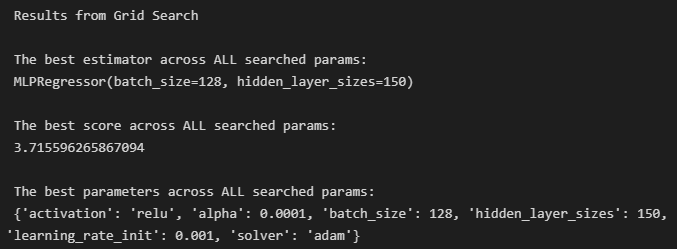

## 5 - Finalize Model

#### 5.1 - Create the finalized pipeline

In [93]:
full_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imp_num_pipeline',
                                                  ColumnTransformer(transformers=[('simpleimputer-1',
                                                                                   SimpleImputer(strategy='most_frequent'),
                                                                                   ['age',
                                                                                    'college_degree']),
                                                                                  ('simpleimputer-2',
                                                                                   SimpleImputer(),
                                                                                   ['problem_solving_skill',
                                                                                    'technology_skill',
                                                                                    'english_skill'])])),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'college_degree',
                                  'pro...
                                 ['birth_continent', 'gender',
                                  'shirt_color_preference',
                                  'remote_work_preference',
                                  'industry_preference']),
                                ('cat_ord',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinal',
                                                  OrdinalEncoder())]),
                                 ['customer_exp_preference',
                                  'work_env_preference',
                                  'personal_growth_preference',
                                  'honest_communication_preference',
                                  'community_service_preference'])])

In [94]:
ml_pipeline = Pipeline([
            ('transformer',full_pipeline),
            ('MLP',MLPRegressor(activation='relu',alpha=0.0001, batch_size=128,
            hidden_layer_sizes=150, learning_rate_init=0.001, solver='adam'))])

#### 5.2 Final Model Performance

COMPARE:<br>
#### R2 Score with imputing our missing values

In [95]:
ml_pipeline.fit(X,y)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imp_num_pipeline',
                                                                   ColumnTransformer(transformers=[('simpleimputer-1',
                                                                                                    SimpleImputer(strategy='most_frequent'),
                                                                                                    ['age',
                                                                                                     'college_degree']),
                                                                                                   ('simpleimputer-2',
                                                                                                    SimpleImputer(),
                                                                                                    ['problem_solving_skill',
                                                                                                     'technology_skill',
                                                                                                     'english_skill'])])),
                                                                  ('scaler',
                                                                   StandardScaler())...
                                                   'remote_work_preference',
                                                   'industry_preference']),
                                                 ('cat_ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['customer_exp_preference',
                                                   'work_env_preference',
                                                   'personal_growth_preference',
                                                   'honest_communication_preference',
                                                   'community_service_preference'])])),
                ('MLP', MLPRegressor(batch_size=128, hidden_layer_sizes=150))])

In [96]:
ml_model = pd.DataFrame({'predict':ml_pipeline.predict(X),'actual':y})

In [97]:
ml_model

,predict,actual
0,62.225832,61.06
1,57.027938,53.20
2,65.973325,70.18
3,58.801411,58.37
4,61.692698,61.77
...,...,...
233931,61.077974,59.15
233932,47.031151,44.12
233933,68.062197,65.28
233934,62.108175,61.65


In [98]:
# R2 score of around 0.773 -- percent outcome variance explained by our predictor attributes
ml_pipeline.score(X,y)

0.7693781628483972

In [99]:
# This is the model prediction against y_true 'Score' value with SimpleImputing null values
ml_model.head(10)

,predict,actual
0,62.225832,61.06
1,57.027938,53.20
2,65.973325,70.18
3,58.801411,58.37
4,61.692698,61.77
5,62.174885,69.63
6,61.484803,59.96
7,52.523851,52.37
8,45.159712,42.72
9,60.360844,59.85


#### R2 Score of dropping all null values

In [100]:
new_df = df_employees.dropna()
X_dropna = new_df.drop('score',axis=1)
y_dropna = new_df['score']

In [101]:
ml_pipeline.fit(X_dropna,y_dropna)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imp_num_pipeline',
                                                                   ColumnTransformer(transformers=[('simpleimputer-1',
                                                                                                    SimpleImputer(strategy='most_frequent'),
                                                                                                    ['age',
                                                                                                     'college_degree']),
                                                                                                   ('simpleimputer-2',
                                                                                                    SimpleImputer(),
                                                                                                    ['problem_solving_skill',
                                                                                                     'technology_skill',
                                                                                                     'english_skill'])])),
                                                                  ('scaler',
                                                                   StandardScaler())...
                                                   'remote_work_preference',
                                                   'industry_preference']),
                                                 ('cat_ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['customer_exp_preference',
                                                   'work_env_preference',
                                                   'personal_growth_preference',
                                                   'honest_communication_preference',
                                                   'community_service_preference'])])),
                ('MLP', MLPRegressor(batch_size=128, hidden_layer_sizes=150))])

In [102]:
new_df = df_employees.dropna()
X = new_df.drop('score',axis=1)
y = new_df['score']

In [103]:
ml_pipeline.fit(X,y)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imp_num_pipeline',
                                                                   ColumnTransformer(transformers=[('simpleimputer-1',
                                                                                                    SimpleImputer(strategy='most_frequent'),
                                                                                                    ['age',
                                                                                                     'college_degree']),
                                                                                                   ('simpleimputer-2',
                                                                                                    SimpleImputer(),
                                                                                                    ['problem_solving_skill',
                                                                                                     'technology_skill',
                                                                                                     'english_skill'])])),
                                                                  ('scaler',
                                                                   StandardScaler())...
                                                   'remote_work_preference',
                                                   'industry_preference']),
                                                 ('cat_ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['customer_exp_preference',
                                                   'work_env_preference',
                                                   'personal_growth_preference',
                                                   'honest_communication_preference',
                                                   'community_service_preference'])])),
                ('MLP', MLPRegressor(batch_size=128, hidden_layer_sizes=150))])

In [104]:
ml_pipeline.score(X_dropna,y_dropna)

0.8629224248071108

The R2 value is higher if we dropped null values compared to imputing the null values with their respective mean/freq. That's impressive; unfortunately, we have to remember that our candidates dataset has some data loss, so our pipeline accommodates for the transformation of our X, so all we have to do is pass the data with null values into the pipeline and predict. Since this is a scenario of file corruption, this ML pipeline should be used. And even if the file wasn't corrupted, I'm sure that this pipeline would still yield even higher result because SimpleImputer wouldn't have any NaN values to impute and would continue through the other standardization/normalization/transformation.

In [105]:
ml_model_dropna = pd.DataFrame({'predict':ml_pipeline.predict(X),'actual':y})

In [106]:
ml_model_dropna.head(10)

,predict,actual
6,60.874570,59.96
7,53.839221,52.37
8,45.335441,42.72
13,70.260553,70.00
14,62.888966,60.88
16,66.708360,65.29
17,59.081077,57.35
21,58.359567,57.77
29,55.616046,55.43
34,59.626321,57.86


Looking at these values, the predicted values aren't that far from our target variable "TRUE" labels. Our RMSE value is only around 3.8; it isn't too overwhelming if we compare that value to the median value of 'Score' target variable (58.1).

## 6 - Predict the Candidates' Score

In [107]:
df_candidates = pd.read_csv('../data/wombi_candidates.csv')
df_candidates.head(2)

,wombus_id,birth_continent,gender,age,college_degree,problem_solving_skill,technology_skill,english_skill,most_recent_income,total_jobs,shirt_color_preference,customer_exp_preference,work_env_preference,personal_growth_preference,honest_communication_preference,community_service_preference,remote_work_preference,industry_preference
0,1105,NaN,Female,NaN,0.0,8.400397,23.348271,9.105426,"77,367",5.0,Purple,Strongly Disagree,Strongly Agree,Agree,Neutral,Strongly Agree,Hybrid,Higher Education
1,1106,North America,Female,52.0,1.0,7.787927,24.799825,9.095713,"78,979",4.0,Blue,Neutral,Strongly Disagree,Disagree,Strongly Agree,Strongly Agree,Hybrid,Finance


In [108]:
# Create the X dataset for df_candidates... for y, we're just predicting with our model
X_cand = df_candidates

In [109]:
# Predict the score using our predictor attributes
cand_score = ml_pipeline.predict(X_cand)

In [110]:
# example of our predicted y value
cand_score[0]

60.34806848185007

In [111]:
# Add our predicted score to the dataframe, clean our data whether it's imputing or other fill method, and save the dataframe in a new csv file
df_candidates['score'] = cand_score.tolist()

# I'll just go ahead and add the similar method of fill, though more of a manual process. Tedious, but I've already used it and it worked the same

df_candidates['shirt_color_preference'] = df_candidates['shirt_color_preference'].replace(np.nan,'Purple')
df_candidates['work_env_preference'] = df_candidates['work_env_preference'].replace(np.nan, 'Strongly Agree')
df_candidates['personal_growth_preference'] = df_candidates['personal_growth_preference'].replace(np.nan, 'Agree')
df_candidates['honest_communication_preference'] = df_candidates['honest_communication_preference'].replace(np.nan, 'Neutral')
df_candidates['community_service_preference'] = df_candidates['community_service_preference'].replace(np.nan,'Strongly Agree')
df_candidates['industry_preference'] = df_candidates['industry_preference'].replace(np.nan,'Tech')
df_candidates['birth_continent'] = df_candidates['birth_continent'].replace(np.nan,'North America')
df_candidates['remote_work_preference'] = df_candidates['remote_work_preference'].replace(np.nan,"Hybrid")
df_candidates['gender'] = df_candidates['gender'].replace(np.nan,'Female')
df_candidates['customer_exp_preference'] = df_candidates['customer_exp_preference'].replace(np.nan,'Neutral')
df_candidates['college_degree'] = df_candidates['college_degree'].replace(np.nan,0).astype('int')
df_candidates['age'] = df_candidates['age'].replace(np.nan,int(df_employees['age'].mean())).astype('int')
df_candidates['problem_solving_skill'] = df_candidates['problem_solving_skill'].replace(np.nan,df_candidates['problem_solving_skill'].mean())
df_candidates['english_skill'] = df_candidates['english_skill'].replace(np.nan, df_candidates['english_skill'].mean())
df_candidates['technology_skill'] = df_candidates['technology_skill'].replace(np.nan, df_candidates['technology_skill'].mean())
df_candidates['most_recent_income'] = df_candidates['most_recent_income'].replace(',','', regex=True).apply(pd.to_numeric)
df_candidates['most_recent_income'] = df_candidates['most_recent_income'].replace(np.nan, int(df_candidates['most_recent_income'].median()))
df_candidates['total_jobs'] = df_candidates['total_jobs'].replace(np.nan, 4)

In [112]:
df_candidates

,wombus_id,birth_continent,gender,age,college_degree,problem_solving_skill,technology_skill,english_skill,most_recent_income,total_jobs,shirt_color_preference,customer_exp_preference,work_env_preference,personal_growth_preference,honest_communication_preference,community_service_preference,remote_work_preference,industry_preference,score
0,1105,North America,Female,44,0,8.400397,23.348271,9.105426,77367.0,5.0,Purple,Strongly Disagree,Strongly Agree,Agree,Neutral,Strongly Agree,Hybrid,Higher Education,60.348068
1,1106,North America,Female,52,1,7.787927,24.799825,9.095713,78979.0,4.0,Blue,Neutral,Strongly Disagree,Disagree,Strongly Agree,Strongly Agree,Hybrid,Finance,68.405106
2,1107,North America,Male,32,0,23.005739,25.484927,8.967305,38932.0,4.0,Blue,Strongly Disagree,Disagree,Agree,Agree,Neutral,On-Site,Finance,50.042567
3,1108,Africa,Male,49,0,15.565866,25.027173,5.914387,58511.0,4.0,Purple,Disagree,Strongly Agree,Agree,Neutral,Strongly Agree,Hybrid,Tech,58.734285
4,1109,North America,Male,47,0,12.784366,30.619283,8.751296,65831.0,4.0,Purple,Strongly Disagree,Disagree,Neutral,Strongly Agree,Strongly Agree,On-Site,Renewable Energy,63.569926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,1549,North America,Male,37,0,14.054447,24.158402,9.376241,62488.0,4.0,Purple,Neutral,Strongly Agree,Agree,Neutral,Disagree,Hybrid,Higher Education,48.480035
445,1550,North America,Male,67,1,12.323157,28.663559,9.351957,67044.0,4.0,Blue,Neutral,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Hybrid,Higher Education,70.147348
446,1551,North America,Male,40,0,19.641136,25.027173,9.137611,47786.0,3.0,Purple,Neutral,Strongly Agree,Agree,Agree,Agree,Hybrid,Renewable Energy,56.831946
447,1552,Asia,Female,58,0,19.343434,25.027173,6.046407,48570.0,2.0,Blue,Disagree,Strongly Disagree,Agree,Neutral,Strongly Agree,Hybrid,Finance,56.497628


In [113]:
df_candidates.isnull().sum()

wombus_id                          0
birth_continent                    0
gender                             0
age                                0
college_degree                     0
problem_solving_skill              0
technology_skill                   0
english_skill                      0
most_recent_income                 0
total_jobs                         0
shirt_color_preference             0
customer_exp_preference            0
work_env_preference                0
personal_growth_preference         0
honest_communication_preference    0
community_service_preference       0
remote_work_preference             0
industry_preference                0
score                              0
dtype: int64

In [114]:
df_candidates.to_csv('../data/candidates_with_score.csv', index=False)

#### 6.1 - Select top 100 Wombus candidates

In [115]:
df_wombus = pd.read_csv('../data/candidates_with_score.csv')
df_wombus.head(5)

,wombus_id,birth_continent,gender,age,college_degree,problem_solving_skill,technology_skill,english_skill,most_recent_income,total_jobs,shirt_color_preference,customer_exp_preference,work_env_preference,personal_growth_preference,honest_communication_preference,community_service_preference,remote_work_preference,industry_preference,score
0,1105,North America,Female,44,0,8.400397,23.348271,9.105426,77367.0,5.0,Purple,Strongly Disagree,Strongly Agree,Agree,Neutral,Strongly Agree,Hybrid,Higher Education,60.348068
1,1106,North America,Female,52,1,7.787927,24.799825,9.095713,78979.0,4.0,Blue,Neutral,Strongly Disagree,Disagree,Strongly Agree,Strongly Agree,Hybrid,Finance,68.405106
2,1107,North America,Male,32,0,23.005739,25.484927,8.967305,38932.0,4.0,Blue,Strongly Disagree,Disagree,Agree,Agree,Neutral,On-Site,Finance,50.042567
3,1108,Africa,Male,49,0,15.565866,25.027173,5.914387,58511.0,4.0,Purple,Disagree,Strongly Agree,Agree,Neutral,Strongly Agree,Hybrid,Tech,58.734285
4,1109,North America,Male,47,0,12.784366,30.619283,8.751296,65831.0,4.0,Purple,Strongly Disagree,Disagree,Neutral,Strongly Agree,Strongly Agree,On-Site,Renewable Energy,63.569926


In [116]:
# Top 100 candidates... Move Score over to the first column, so it's easier to compare each candidates' attributes
first_col = df_wombus.pop('score')
df_wombus.insert(0,'score',first_col)
df_wombus.sort_values('score',ascending=False)[:101]

,score,wombus_id,birth_continent,gender,age,college_degree,problem_solving_skill,technology_skill,english_skill,most_recent_income,total_jobs,shirt_color_preference,customer_exp_preference,work_env_preference,personal_growth_preference,honest_communication_preference,community_service_preference,remote_work_preference,industry_preference
231,77.022418,1336,North America,Female,41,0,10.264156,27.730911,8.972312,72463.0,4.0,Purple,Neutral,Neutral,Strongly Agree,Strongly Agree,Strongly Agree,On-Site,Tech
436,75.815542,1541,North America,Male,60,1,12.650772,15.426507,9.710996,66182.0,6.0,Blue,Strongly Agree,Disagree,Agree,Strongly Agree,Strongly Agree,Hybrid,Tech
230,75.538972,1335,North America,Male,68,0,17.723768,9.927479,10.000967,52832.0,6.0,Blue,Strongly Agree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,On-Site,Higher Education
110,74.897023,1215,Asia,Female,52,0,12.420726,10.548886,7.758287,66788.0,4.0,Purple,Strongly Agree,Strongly Agree,Agree,Neutral,Strongly Agree,On-Site,Finance
180,74.830402,1285,Asia,Male,60,0,14.726201,33.239862,5.916148,54353.0,1.0,Purple,Strongly Agree,Neutral,Agree,Strongly Agree,Strongly Agree,On-Site,Higher Education
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,64.070855,1368,North America,Female,58,0,19.241474,27.456038,7.758287,48838.0,4.0,Blue,Strongly Agree,Strongly Agree,Agree,Agree,Agree,On-Site,Tech
200,64.038663,1305,North America,Female,66,1,11.341050,27.904244,7.238578,69629.0,4.0,Blue,Neutral,Neutral,Agree,Neutral,Strongly Agree,Hybrid,Finance
302,64.032399,1407,Asia,Female,47,0,17.811200,24.055465,7.758287,52602.0,4.0,Blue,Agree,Disagree,Agree,Neutral,Strongly Agree,Hybrid,Tech
257,63.994686,1362,North America,Male,30,0,13.511088,23.146441,9.564486,63918.0,4.0,Purple,Neutral,Neutral,Agree,Agree,Strongly Agree,Hybrid,Higher Education


############################################## CLASSIFICATION ASSESSMENT ##########################################

It seems our min value for the Wombus Candidates dataframe is around 64. So we will use this value as a decision boundary threshold.

## 7 - Decision Boundaries Analysis
Now that we've deployed our model, it's time to modify the 'SCORE' as candidates to PASS or REJECT. Since the NelNet only has resources to interview 100 candidates, we've tested our ML pipeline on the candidates data and found the top 100 candidates through pandas sorting function. When viewing the lowest score value, we saw it to be leaning towards 64. So if the candidates have a score value of >= 64, it will be classified as pass. If score is < 64, reject the candidate. 

In [117]:
true_value = df_wombus['score']

In [118]:
acceptance = pd.cut(df_wombus['score'], bins =[0,64,100], labels=['reject','pass'])

In [119]:
# This is to check if our labeling of our scoring and string matches, in this case. yes.
pd.DataFrame({'score':true_value,'screening':acceptance})

,score,screening
0,60.348068,reject
1,68.405106,pass
2,50.042567,reject
3,58.734285,reject
4,63.569926,reject
...,...,...
444,48.480035,reject
445,70.147348,pass
446,56.831946,reject
447,56.497628,reject


Since these are similar with each other, we can just drop the scoring and add screening to the dataframe classify this column once more, so that reject=0 and pass=1<br>
The reason we did this is so that we can confirm that our cuts are placed correctly, nothing else.

In [120]:
df_wombus = df_wombus.drop('score',axis=1)
df_wombus.insert(0,'screening',acceptance)
df_wombus['screening'] = df_wombus['screening'].replace('reject',0).replace('pass',1).astype('int')
df_wombus.head(5)

,screening,wombus_id,birth_continent,gender,age,college_degree,problem_solving_skill,technology_skill,english_skill,most_recent_income,total_jobs,shirt_color_preference,customer_exp_preference,work_env_preference,personal_growth_preference,honest_communication_preference,community_service_preference,remote_work_preference,industry_preference
0,0,1105,North America,Female,44,0,8.400397,23.348271,9.105426,77367.0,5.0,Purple,Strongly Disagree,Strongly Agree,Agree,Neutral,Strongly Agree,Hybrid,Higher Education
1,1,1106,North America,Female,52,1,7.787927,24.799825,9.095713,78979.0,4.0,Blue,Neutral,Strongly Disagree,Disagree,Strongly Agree,Strongly Agree,Hybrid,Finance
2,0,1107,North America,Male,32,0,23.005739,25.484927,8.967305,38932.0,4.0,Blue,Strongly Disagree,Disagree,Agree,Agree,Neutral,On-Site,Finance
3,0,1108,Africa,Male,49,0,15.565866,25.027173,5.914387,58511.0,4.0,Purple,Disagree,Strongly Agree,Agree,Neutral,Strongly Agree,Hybrid,Tech
4,0,1109,North America,Male,47,0,12.784366,30.619283,8.751296,65831.0,4.0,Purple,Strongly Disagree,Disagree,Neutral,Strongly Agree,Strongly Agree,On-Site,Renewable Energy


In [121]:
# Now remember about that multicollinearity? we drop we drop most_recent_income and total_jobs. Also, wombus_id because it doesn't tell us anything
df_wombus.select_dtypes(include=['number']).columns

Index(['screening', 'wombus_id', 'age', 'college_degree',
       'problem_solving_skill', 'technology_skill', 'english_skill',
       'most_recent_income', 'total_jobs'],
      dtype='object')

In [122]:
df_wombus = df_wombus.drop(['most_recent_income','total_jobs','wombus_id'],axis=1)
df_wombus.head(5)

,screening,birth_continent,gender,age,college_degree,problem_solving_skill,technology_skill,english_skill,shirt_color_preference,customer_exp_preference,work_env_preference,personal_growth_preference,honest_communication_preference,community_service_preference,remote_work_preference,industry_preference
0,0,North America,Female,44,0,8.400397,23.348271,9.105426,Purple,Strongly Disagree,Strongly Agree,Agree,Neutral,Strongly Agree,Hybrid,Higher Education
1,1,North America,Female,52,1,7.787927,24.799825,9.095713,Blue,Neutral,Strongly Disagree,Disagree,Strongly Agree,Strongly Agree,Hybrid,Finance
2,0,North America,Male,32,0,23.005739,25.484927,8.967305,Blue,Strongly Disagree,Disagree,Agree,Agree,Neutral,On-Site,Finance
3,0,Africa,Male,49,0,15.565866,25.027173,5.914387,Purple,Disagree,Strongly Agree,Agree,Neutral,Strongly Agree,Hybrid,Tech
4,0,North America,Male,47,0,12.784366,30.619283,8.751296,Purple,Strongly Disagree,Disagree,Neutral,Strongly Agree,Strongly Agree,On-Site,Renewable Energy


In [123]:
df = df_wombus[df_wombus.select_dtypes(include=['number']).columns]

Remember that problem solving and age had high correlation with 'scoring'

In [124]:
df[['problem_solving_skill','age']]

,problem_solving_skill,age
0,8.400397,44
1,7.787927,52
2,23.005739,32
3,15.565866,49
4,12.784366,47
...,...,...
444,14.054447,37
445,12.323157,67
446,19.641136,40
447,19.343434,58


In [125]:
col = ['problem_solving_skill','age']

In [126]:
X_wombus = df[['problem_solving_skill','age']].values
y_wombus = df['screening'].values

In [127]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X_wombus, y_wombus)
parameter = log_reg.coef_[0]
parameter0 = log_reg.intercept_
weights = pd.Series(log_reg.coef_[0], index=col)

In [128]:
log_reg.coef_.T

array([[-0.18159482],
       [ 0.02910229]])

Create Train Test Split for evaluation

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X_wombus, y_wombus, test_size = 0.2, random_state = 42)

In [131]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [132]:
log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(C=10000000000, random_state=42)

In [133]:
y_pred = log_reg.predict(X_test)

In [134]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)
print(acc_score*100)

85.55555555555556


Accuracy score of 85% on our test set, not terrible considering we had data loss from the beginning.

I'll test if K-Means Clustering helps boost the accuracy

In [135]:
from sklearn.cluster import KMeans
pipeline = Pipeline([
        ('kmeans',KMeans(n_clusters=50)),
        ('log_reg',LogisticRegression())
])

In [136]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                ('log_reg', LogisticRegression())])

In [137]:
pipeline.score(X_test, y_test)

0.8444444444444444

We can see that it went slightly worse on our test set, though another possibility is to use gridsearchcv to find a better number of cluster value instead of default 50.

In [138]:
param_grid = dict(kmeans__n_clusters=range(2,65))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=0)
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                                       ('log_reg', LogisticRegression())]),
             param_grid={'kmeans__n_clusters': range(2, 65)})

In [139]:
grid_clf.best_params_

{'kmeans__n_clusters': 12}

In [140]:
grid_clf.score(X_test, y_test)

0.8444444444444444

No change after the GridSearchCV, there are more hypothesis that I would like to test using other clustering algorithm, but for simplicity, this result is fine because I don't have currently don't have much time before my presentation interview.

#### Plot the Decision Boundary 

Saving figure Decision_Boundary


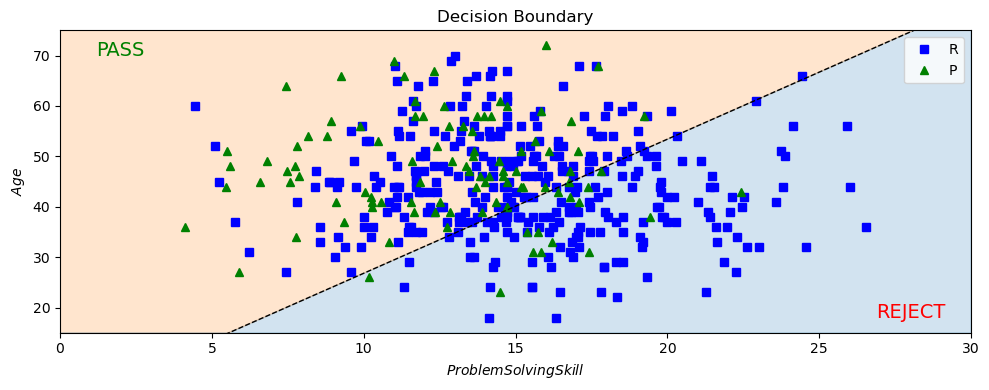

In [156]:
# parameters for Decision Boundary
b = parameter0
w1, w2 = log_reg.coef_.T
c = -b/w2
m = -w1/w2

xmin, xmax = 0, 30
ymin, ymax = 15, 75
xd = np.array([xmin, xmax])
yd = m*xd + c

# Randomize data that matches our predictor variable to be 0 (rejected) or 1 (pass)
x0, x1 = np.meshgrid(
    np.linspace(4,72, 500).reshape(-1,1),
    np.linspace(4,30,200).reshape(-1,1)
)
X_new = np.c_[(x0.ravel(), x1.ravel())]
# Predict our randomized data with LogisticRegression()
y_proba = log_reg.predict_proba(X_new)

#Create the plot
plt.figure(figsize=(10, 4))

plt.plot(X_wombus[y_wombus==0, 0], X_wombus[y_wombus==0, 1], "bs")
plt.plot(X_wombus[y_wombus==1, 0], X_wombus[y_wombus==1, 1], "g^")

left_right = np.array([0, 30])

plt.text(2,70, "PASS", fontsize=14, color = "g", ha="center")
plt.text(28,18, "REJECT", fontsize=14, color = "r", ha="center")

plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

plt.axis([0, 30, 15, 75])
plt.ylabel(r'$Age$')
plt.xlabel(r'$Problem Solving Skill$')
plt.legend('RP')
plt.title('Decision Boundary')
save_fig('Decision_Boundary',model_path)

## 8 - Saving Model for Deployment

In [141]:
import pickle
pickle.dump(ml_pipeline, open('../Final_Scoring.pkl','wb'))

In [142]:
# If we want to load the model once again
with open('../Final_Scoring.pkl','rb') as f:
    model = pickle.load(f)